
### <u>Expedia Explorations: A Machine Learning Approach to Hotel Recommendation Systems</u>


____________________________________________________________________________________________________________________


#### || `Project Members` || : <br>
<b>Yinbo Hu</b> (<u>yh3184</u>) · <b>Junyi Yao</b> (<u>jy3178</u>) · <b>Karen Jan</b> (<u>kj2546</u>) · <b>Rishav Agarwal</b> (<u>ra3141</u>) · <b>Austin Lee</b> (<u>aal2194</u>)

#### || `Assignment Dates` || : <br>
<b>Proposal Deadline</b> (<u>02/21/2022</u>) · <b>Presentation Deadline</b> (<u>03/21/2022</u>) · <b>Report & Code Deadline</b> (<u>04/25/2022</u>)

____________________________________________________________________________________________________________________


#### || `Target Goals & Applications` || : <br>

<b>1. Target Goal (<u>Hotel Clusters</u>):</b> <br><br>Predict up to 5 hotel clusters users are most likely to belong to. Hotel clusters will be assigned as the multi-class classification target variable using other adjacent feature combinations as input variables. The hotel cluster type users belong to will be the recommended accommodations predicted for the user. Train, test, interpret, and determine the best model, hyperparameters, and feature selections that fits this goal. This multiclass output variable is stored in 'hotel_clusters', signifying recommendable hotel groups.

<b>2. Target Goal (<u>Booking Outcomes</u>):</b> <br><br>Predict whether a user will book (1) or not (0), based off feature sets available. Hotel cluster can also be used or negated for training and test iterations. Train, test, interpret, and determine the best model, hyperparameters, and feature selections that fits this goal. This binary output variable is stored in 'is_booking', signifying booking decision outcomes per user.


#### || `Prerequisite Notes` || : <br>

Hotel cluster types are predetermined by an internal algorithm from Expedia. This algortihm is not shared to external contributors towards project submissions. Feature importances for this hidden method can be further explored and estimated through modeling and feature engineering methods executed in later post-modeling steps, if time permits.


### <u>Step [0] : Import Prerequisite Packages & Modules. Define File Directory Locations & Nomenclatures.</u>


#### `Part A.` Import all Prerequisite Packages & Modules.

In [288]:
##########################################################################################################################################################################################################################################################

# Import Pandas for data structure manipulations.
import pandas as pd

# Import NumPy for numerical analysis.
import numpy as np

# Import a timer.
import time

# Import the train_test_split, cross-validation, and grid search modules from Scikit-Learn.
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, cross_val_predict

# Import the One-Hot Encoder, Target Encoder, StandardScaler for later categorical to numeric encoding.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Import the column transformer that can be used for scaling purposes in later steps.
from sklearn.compose import make_column_transformer

# Import the pipeline module for step-wise transformations in later steps.
# Use the imbalanced Skikit-Learn modules as well for potential sampling steps later. (i.e. For imbalanced data, etc.)
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Import the mean_squared_error module from Scikit-Learn as a quick error metric.
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error, confusion_matrix, average_precision_score, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

# Import the principal component analysis (PCA) module from Scikit-Learn as a potential feature array compression method.
from sklearn.decomposition import PCA

# Import the T-distributed Stochastic Neighbor Embedding module from Scikit-Learn for high-dimensionality visualizations.
from sklearn.manifold import TSNE

# Import the support vector machine (SVM) module from Skikit-Learn. 
from sklearn.svm import LinearSVC, SVC

# Import the LogR module from Skikit-Learn. 
from sklearn.linear_model import LogisticRegression

# Import DecisionTreeClassifer and tree visualizatoin methods from Scikit-Learn.
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Use the experimental method in Scikit-Learn to enable HistGradientBoostingClassifier.
from sklearn.experimental import enable_hist_gradient_boosting

# Import the RandomForestClassifier, GradientBoostingClassifier, and HistGradientBoostingClassifier from Scikit-Learn.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

# Import the XGBoost module from Scikit-Learn. Be sure to 'brew install cmake' in CLI.
# Next, 'pip install xgboost' in CLI or do a '!pip install xgboost' in iPython. This makes XGBoost accessible.
!pip install xgboost
import xgboost as xgb

# Install Tensorflow to this kernel session, if it does not already exist in the remote conda environment.
# Import tensorflow as an abbreviated term. This will allow access to the Keras library methods.
# This will help to bring in the Tensorflow and Keras modules if we want to apply neural networks to our predictive analysis.
!pip install tensorflow
import tensorflow as tf

# Import MatPlotLib for data exploration and visualizations.
import matplotlib.pyplot as plt

# Import Seaborn for data exploration and visualizations.
import seaborn as sns

# Import pretty printer for result outputs.
import pprint 

# Substantiate pretty printer as pp with an indentation of 4 spaces.
pp = pprint.PrettyPrinter(indent=4)

# Set the grid style for Seaborn. I prefer darkgrid.
sns.set_style('darkgrid')

# Download MatPlotLib with a magic command to ensure it is present in script environment.
%matplotlib inline

# Ignore unnecessary warnings. This will clean up output appearances.
import warnings
warnings.filterwarnings('ignore')

##########################################################################################################################################################################################################################################################

#### `Part B.` Define File Directory Locations & Nomenclatures.

In [3]:
##########################################################################################################################################################################################################################################################

# Specify the name of the local 'data' directory data files will be stored.
data_folder = 'data/'

# Specify the data file extension .csv that training and test sets will be pulled from.
csv_extension = '.csv'

##########################################################################################################################################################################################################################################################

#### `Part C.` Access the Full Data Directory.

In [4]:
##########################################################################################################################################################################################################################################################

# Grab the data files available in the local directory 'data'. 
# This folder is directly adjacent/parallel to this script file level in the directory.
# There should be three main sets - Training, test, and destination. The destination set is for supplemental merging.
! ls data/

##########################################################################################################################################################################################################################################################

destinations.csv     test.csv             train.csv
destinations.csv.zip test.csv.zip         train.csv.zip


### Step [1] : Initial Data Exploration. Read & Explore the Data.

#### `Exploration Checklist` :
- Determine the data type for each feature column (i.e. float, int, category/ordinal, datetime, etc.).
- Examine descriptive statistics and distributions of applicable numeric features (i.e. min, max, median, quantiles, etc.). Plot these distributions via boxplots.
- Test for colinear and multicolinear features. Remove the features where appropriate.
- Do a last check for NaN values. Ensure all have either been negated or imputed to ensure a complete dataframe with no null values.
- Plot the categorical cluster types to determine type distributions. 

#### `Part A.` Read the Training Data.

In [5]:
##########################################################################################################################################################################################################################################################

# Grab the training data available from the data directory.
train = pd.read_csv(data_folder + 'train' + csv_extension)

# Observe the first 5 items of the training set.
train.head(5)

##########################################################################################################################################################################################################################################################

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [6]:
##########################################################################################################################################################################################################################################################

# View the training set dimensions.
# There are 37,670,293 samples (i.e. user instances) and 24 features in the training set. 
print(f'\n\033[1mTraining Set Row Count:\033[0m {train.shape[0]}')
print(f'\n\033[1mTraining Set Feature Count:\033[0m {train.shape[1]}')

##########################################################################################################################################################################################################################################################


Training Set Row Count: 37670293

Training Set Feature Count: 24


#### `Part B.` Observe the Data Types of the Feature Selection in the Training Set.

#### `Training & Test Set Description` : 

<br>

![feature_dtypes_train_test](imgs/feature_dtypes_train_test.png)

[<b>Kaggle Source -</b> Linked Here](https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=sample_submission.csv)

<br>

<b>`Data Exploration Notes` :</b>

All the features are either rendered as int or float. However, upon closer inspection they all appear to be a categorical feature. 

<b>The ones listed below are actual int, float, or datetime (not categorically oriented): </b><br><br>
    - orig_destination_distance <br>
    - date_time <br>
    - srch_ci <br>
    - srch_co <br>
    - srch_adults_cnt <br>
    - srch_children_cnt <br>
    - cnt
    
The other features aside from these select 7 are categorical in nature.

We need to consider how to encode these in some way. One-Hot vs. Target? I think we should encode these, because having srch_destination_id = 8250 is not inherently worse than having it = 14984. Also, should we consider scaling? Because, the ID values can get incredibly high. <br>

Based on what we defined as "insights from explorations" (some plots, relations, scaling", I'll leave this section to for the team to decide. Some (potentially) helpful things to plot: distribution of target variable (hotel_cluster) for each categorical var (maybe side-by-side bar plots?), maybe some sort of cluster plot? idk kinda just spitballing. Maybe take a look at hw1 for inspiration? <br><br>


<b>`Data Cleansing Notes` :</b>

After converting the feature types to the correct data type designations (i.e. ensure the 7 listed features above are numeric and convert all other features to nominal categorical data types), we should One-Hot encode feature with lower unique types. 

For example, if a feature has 5 or under class types within it, we can just One-Hot encode. In contrast, if we see there are categoricals like destination types (via immense ID distributions), we can just target encode these values ensure the dimensionality of our dataframe doesn't expand too exponentially.

We can scale features that are actually numeric in nature (i.e. the 7 selected columns shown above). A basic z-scale (i.e. StandardScaler()) or minmax scale (i.e. MinMaxScaler()) method should be adequate for those use cases. Since ID designated columns are just representative of categorical types (and not true continuous values of interest), we'll encode these instead of scaling them. <br><br>


#### `Part C.` Explore & Examine the Initial Descriptive Statistics of Training Set Features. Include Distributions and Visualizations.

In [7]:
##########################################################################################################################################################################################################################################################

# View the descriptive statistics for numeric feaures. 

# For our dataset, this isn't particularly telling for most features - Only the features that are count based.

# Note that this is just a preliminary observation - Not all numeric features are actually continuous values, even if they look like numbers.

# Some numeric indexed columns are actually categorical serial types used to define a region, area, destination, etc. These indexed by numbers, but these numbers only denote indices, not actual values.
# This is done by Expedia to obfuscate actual categorical/qualitative knowledge from proprietary data hidden from competitors.

# Internally, Expedia will know how to match these categorical serials back to actual names for destinations (etc.), once feature selections are derived by outcome.
display(train.describe())

# The features to pay attention to for this step are:
# -> orig_destination_distance, srch_adult_cnt, srch_child_cnt, srch_rm_cnt.
display(train[['orig_destination_distance', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']].describe())

##########################################################################################################################################################################################################################################################

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,2.414529e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,...,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,9.795271e+00,2.680473e+00,8.610880e+01,3.084060e+02,2.775304e+04,1.970090e+03,6.044518e+05,1.349265e-01,2.489042e-01,5.870761e+00,...,3.321222e-01,1.112663e+00,1.444109e+04,2.582280e+00,7.965675e-02,1.483384e+00,3.156305e+00,8.129685e+01,6.004619e+02,4.980861e+01
std,1.196754e+01,7.480393e-01,5.924310e+01,2.084437e+02,1.678255e+04,2.232442e+03,3.506175e+05,3.416451e-01,4.323782e-01,3.717095e+00,...,7.314981e-01,4.591155e-01,1.106630e+04,2.153019e+00,2.707611e-01,1.219776e+00,1.623189e+00,5.617119e+01,5.117391e+02,2.891595e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.300900e+04,3.131670e+02,2.989100e+05,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,1.600000e+02,2.500000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,1.140491e+03,6.039140e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.241300e+04,2.552599e+03,9.101680e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.060000e+02,7.010000e+02,7.300000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650800e+04,1.240790e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,...,9.000000e+00,8.000000e+00,6.510700e+04,9.000000e+00,1.000000e+00,2.690000e+02,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,2.414529e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,1.970090e+03,2.024296e+00,3.321222e-01,1.112663e+00
std,2.232442e+03,9.116678e-01,7.314981e-01,4.591155e-01
min,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.131670e+02,2.000000e+00,0.000000e+00,1.000000e+00
50%,1.140491e+03,2.000000e+00,0.000000e+00,1.000000e+00
75%,2.552599e+03,2.000000e+00,0.000000e+00,1.000000e+00
max,1.240790e+04,9.000000e+00,9.000000e+00,8.000000e+00


#### `Part D.` Cleanse the Initial Training Set Features by Converting Data Types, Retaining Meaningful Features, & Inaccurate Dates.

In [8]:
##########################################################################################################################################################################################################################################################

# Insert visualizations below from applicable numeric features derived here.
# Note that we only want to view numeric distributions of true continuous variables ONLY:
# orig_destination_distance, date_time, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, cnt

# Use boxplots to show the descriptive statistics. There can be 7 preliminary visualizations. 
# For now, let's just stick to the orig_destination_distance, srch_adults_cnt, srch_children_cnt, srch_adults_cnt + srch_children_cnt. 

# This is very high-level, so for now, just delete the NaN values for such basic visualizations.
# It'll add intuition into what we'd want to do later in cleaning and model fitting steps.

# We can also manipulate a trip_duration from (srch_co - srch_ci) and plot this too, but we'll save this for last.
# There are some messed up dates we'll want to fix like '2557-08-17 00:00:00'.

# Make a dataframe to support only the truly numeric features we would like to view distributions for.
# Keep the user_id for now in case you need to remerge the other feature columns later with the initial train dataframe.
train_numeric_viz_df = pd.DataFrame({'user_id': train.user_id.astype('category'),
                                     'trip_distances': train.orig_destination_distance.astype(float),
                                     'search_timestamp': pd.to_datetime(train.date_time, format = '%Y%m%d', errors = 'ignore'),
                                     'checkin_timestamp': pd.to_datetime(train.srch_ci, format = '%Y%m%d', errors = 'ignore'),
                                     'checkout_timestamp': pd.to_datetime(train.srch_co, format = '%Y%m%d', errors = 'ignore'),
                                     'adult_count': train.srch_adults_cnt.astype(int),
                                     'child_count': train.srch_children_cnt.astype(int),
                                     'total_count': train.srch_adults_cnt.astype(int) + train.srch_children_cnt.astype(int),
                                     'rooms': train.srch_rm_cnt.astype(int),
                                     'hotel_cluster': train.hotel_cluster.astype('category'),
                                     'booking_outcome': train.is_booking.astype('category')})

# Delete all NaN values - This isn't necessarily something we'd want to flatly do in process, depending on the proportions and locations of NaN values viewed later.
# This likely won't effect our modeling results too heavily later if we did delete them all, because the dataset is so immense.
# This is just to help us generalize high-level patterns, skewness, etc., prior to further cleansing steps.
train_num_features_viz_df = train_numeric_viz_df.dropna()

# Also, the training set dates must be between 2013 and 2014 - Anything smaller or bigger should be deleted as well.
# This is explicitly mentioned in the dataset documentation on Kaggle.
# As such, timestamps for the test set must also only be within 2015. We'll take care of that later.

# Filter out the irrelevant checkin dates that fall out of the relevant range. 
# According to the documents, the date values for training are for 2013 up to 2015 (exclusive).
lower_boundary_dates_train = train_num_features_viz_df['checkin_timestamp'] >= '2013-01-01'
upper_boundary_dates_train = train_num_features_viz_df['checkin_timestamp'] < '2015-01-01'
between_two_dates = lower_boundary_dates_train & upper_boundary_dates_train
train_num_features_viz_df = train_num_features_viz_df.loc[between_two_dates]

# Filter out the irrelevant checkout dates that fall out of the relevant range. 
# According to the documents, the date values for training are for 2013 up to 2015 (exclusive).
lower_boundary_dates_train = train_num_features_viz_df['checkout_timestamp'] >= '2013-01-01'
upper_boundary_dates_train = train_num_features_viz_df['checkout_timestamp'] < '2015-01-01'
between_two_dates = lower_boundary_dates_train & upper_boundary_dates_train
train_num_features_viz_df = train_num_features_viz_df.loc[between_two_dates]

# After we've cleaned out the NaN values and truncated the date ranges, we will want to make a new column to support the trip_duration.
# This is just a basic different between checkout and checkin dates.
train_num_features_viz_df['trip_durations'] = pd.to_datetime(train_num_features_viz_df.checkout_timestamp) - pd.to_datetime(train_num_features_viz_df.checkin_timestamp)

# Next, also see how far ahead the users generally search for availabilities, prior to the checkin periods.
train_num_features_viz_df['search_advances'] = (pd.to_datetime(train_num_features_viz_df.checkin_timestamp) - pd.to_datetime(train_num_features_viz_df.search_timestamp)).astype('timedelta64[D]')

# There are some negative search advances (i.e. people search for past hotel availabilities).
# These are people who aren't going to seriously book at all through those sessions, because that is impossible.
# As such, these examples are just noise when it comes to real booking predictions. Get rid of them.
train_num_features_viz_df = train_num_features_viz_df[train_num_features_viz_df.search_advances >= 0]

# Shift this column to be the 4th column - This is just for organized aesthetics.
train_num_features_viz_df = train_num_features_viz_df[['user_id', 'trip_distances', 'trip_durations', 'search_advances', 'search_timestamp','checkin_timestamp', 
                                                       'checkout_timestamp', 'adult_count', 'child_count', 'total_count', 'rooms', 'hotel_cluster', 'booking_outcome']]

# View the dataframe we'll use for visualizations. 
train_num_features_viz_df

##########################################################################################################################################################################################################################################################

,user_id,trip_distances,trip_durations,search_advances,search_timestamp,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,rooms,hotel_cluster,booking_outcome
0,12,2234.2641,4 days,15.0,2014-08-11 07:46:59,2014-08-27,2014-08-31,2,0,2,1,1,0
1,12,2234.2641,4 days,17.0,2014-08-11 08:22:12,2014-08-29,2014-09-02,2,0,2,1,1,1
2,12,2234.2641,4 days,17.0,2014-08-11 08:24:33,2014-08-29,2014-09-02,2,0,2,1,1,0
3,93,913.1932,5 days,105.0,2014-08-09 18:05:16,2014-11-23,2014-11-28,2,0,2,1,80,0
4,93,913.6259,5 days,105.0,2014-08-09 18:08:18,2014-11-23,2014-11-28,2,0,2,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37670285,1198182,649.6568,1 days,11.0,2014-07-15 10:37:42,2014-07-27,2014-07-28,1,0,1,1,77,1
37670286,1198182,663.3917,4 days,12.0,2014-07-15 10:41:07,2014-07-28,2014-08-01,1,0,1,1,33,0
37670287,1198182,677.3041,4 days,12.0,2014-07-15 10:48:01,2014-07-28,2014-08-01,1,0,1,1,40,0
37670288,1198182,2348.4075,6 days,74.0,2014-09-02 08:08:28,2014-11-16,2014-11-22,2,0,2,1,26,0


In [9]:
##########################################################################################################################################################################################################################################################

# How many row samples were filtered out from this cleanse cycle?
print(f'\n\033[1mInitial Training Samples Available:\033[0m\n\n{len(train)}\n')
print(f'\n\033[1mNew Training Samples Available:\033[0m\n\n{len(train_num_features_viz_df)}\n')
print(f'\n\033[1mIrrelevant Training Samples Removed:\033[0m\n\n{len(train) - len(train_num_features_viz_df)}\n')

##########################################################################################################################################################################################################################################################


Initial Training Samples Available:

37670293


New Training Samples Available:

20250656


Irrelevant Training Samples Removed:

17419637



#### `Part E.` Explore & Visualize Training Set Features after First Cleansing Round. Include Distributions and Visualizations Below.

In [10]:
##########################################################################################################################################################################################################################################################

# Make another dateframe version with the trip_durations just changes to integers.
# This needs to be done in order for the boxplots to render correctly below.
train_viz_df = train_num_features_viz_df.copy()
train_viz_df['trip_durations'] = train_viz_df['trip_durations'].dt.days

# View this new dataframe train_viz_df.
train_viz_df

##########################################################################################################################################################################################################################################################

,user_id,trip_distances,trip_durations,search_advances,search_timestamp,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,rooms,hotel_cluster,booking_outcome
0,12,2234.2641,4,15.0,2014-08-11 07:46:59,2014-08-27,2014-08-31,2,0,2,1,1,0
1,12,2234.2641,4,17.0,2014-08-11 08:22:12,2014-08-29,2014-09-02,2,0,2,1,1,1
2,12,2234.2641,4,17.0,2014-08-11 08:24:33,2014-08-29,2014-09-02,2,0,2,1,1,0
3,93,913.1932,5,105.0,2014-08-09 18:05:16,2014-11-23,2014-11-28,2,0,2,1,80,0
4,93,913.6259,5,105.0,2014-08-09 18:08:18,2014-11-23,2014-11-28,2,0,2,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37670285,1198182,649.6568,1,11.0,2014-07-15 10:37:42,2014-07-27,2014-07-28,1,0,1,1,77,1
37670286,1198182,663.3917,4,12.0,2014-07-15 10:41:07,2014-07-28,2014-08-01,1,0,1,1,33,0
37670287,1198182,677.3041,4,12.0,2014-07-15 10:48:01,2014-07-28,2014-08-01,1,0,1,1,40,0
37670288,1198182,2348.4075,6,74.0,2014-09-02 08:08:28,2014-11-16,2014-11-22,2,0,2,1,26,0



Mean Trip Distance for Actual Booking Users: 1721.2532753156406 Miles


Mean Trip Durations for Actual Booking Users: 2.351835533047339 Days



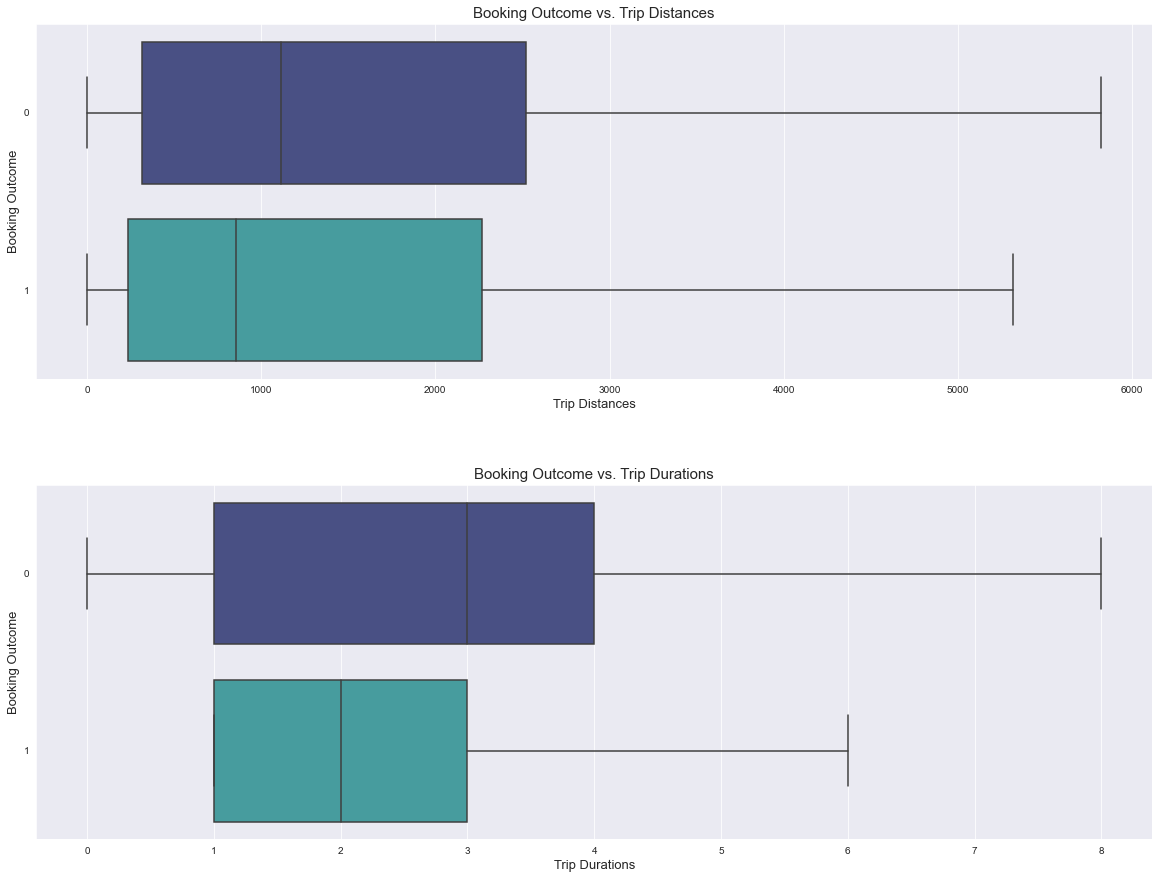

In [11]:
##########################################################################################################################################################################################################################################################

### *** View the general distribution trends between booking outcomes vs. (trip_distances + trip_durations).

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(2, 1, figsize = (20,15))
plt.subplots_adjust(hspace = 0.3)

# Boxplot 1: Training Booking Outcomes vs. Trip Distances. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_distances', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Booking Outcome vs. Trip Distances', fontsize = 15);
ax[0].set_xlabel('Trip Distances', fontsize = 13);
ax[0].set_ylabel('Booking Outcome', fontsize = 13);

# Boxplot 2: Training Booking Outcomes vs. Trip Durations. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_durations', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Booking Outcome vs. Trip Durations', fontsize = 15);
ax[1].set_xlabel('Trip Durations', fontsize = 13);
ax[1].set_ylabel('Booking Outcome', fontsize = 13);

# As shown here, you'll see that for those who book, trip distances are generally lower and is right skewed.
# We will probably want to capitalize more on the shorter distance trip offerings (i.e. by inference, they're logistically easier and less expensive).
print(f'\n\033[1mMean Trip Distance for Actual Booking Users:\033[0m {train_viz_df[train_viz_df.booking_outcome == 1].trip_distances.mean()} Miles\n')

# We also see here that trip durations are usually narrowed to shorter durations for those who do book (i.e. by inference, most people cannot afford to take off too many DTO days, etc.).
print(f'\n\033[1mMean Trip Durations for Actual Booking Users:\033[0m {train_viz_df[train_viz_df.booking_outcome == 1].trip_durations.mean()} Days\n')

##########################################################################################################################################################################################################################################################


Percentage of All Users with No Kids: 77.71128006914937%

Percentage of Actual Booking Users with No Kids: 80.35593594232556%



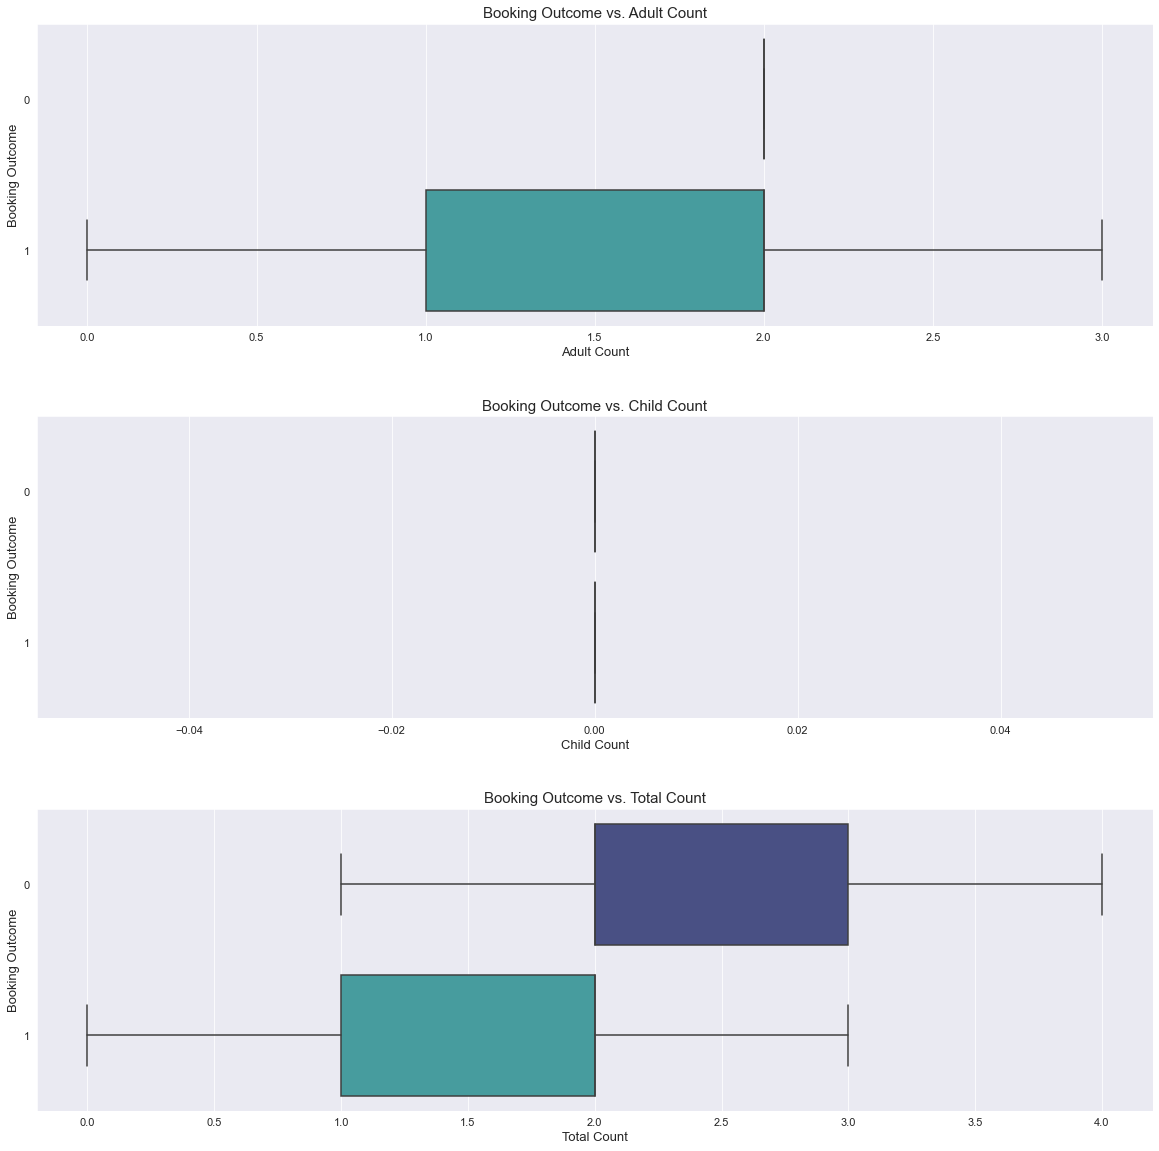

In [12]:
##########################################################################################################################################################################################################################################################

### *** View the general distribution trends between booking outcomes vs. (adult_count + child_count + total_count).

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(3, 1, figsize = (20,20))
plt.subplots_adjust(hspace = 0.3)

# Training Booking Outcomes vs. Adult Count. 
# Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'adult_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Booking Outcome vs. Adult Count', fontsize = 15);
ax[0].set_xlabel('Adult Count', fontsize = 13);
ax[0].set_ylabel('Booking Outcome', fontsize = 13);
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 11);

# Training Booking Outcomes vs. Child Count. 
# Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'child_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Booking Outcome vs. Child Count', fontsize = 15);
ax[1].set_xlabel('Child Count', fontsize = 13);
ax[1].set_ylabel('Booking Outcome', fontsize = 13);
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 11);

# Training Booking Outcomes vs. Total Count. 
# Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'total_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[2]);
ax[2].set_title('Booking Outcome vs. Total Count', fontsize = 15);
ax[2].set_xlabel('Total Count', fontsize = 13);
ax[2].set_ylabel('Booking Outcome', fontsize = 13);
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 11);

# The predominant amount of people have little to no children. 
# (train_viz_df.child_count.value_counts()[0] / len(train_viz_df)) * 100 = 78.65% of these people have no children.
print(f'\033[1m\nPercentage of All Users with No Kids:\033[0m {(train_viz_df.child_count.value_counts()[0] / len(train_viz_df)) * 100}%\n')

# If you look at only people who actually book, this is still the case and even increases.
#(train_viz_df[train_viz_df.booking_outcome == 1].child_count.value_counts()[0] / len(train_viz_df[train_viz_df.booking_outcome == 1])) * 100 = 80.96% have no children of those that book.
print(f'\033[1mPercentage of Actual Booking Users with No Kids:\033[0m {(train_viz_df[train_viz_df.booking_outcome == 1].child_count.value_counts()[0] / len(train_viz_df[train_viz_df.booking_outcome == 1])) * 100}%\n')

# This means that most of the people we'd like to observe in our target demographic have no children.
# They're also cheaper/budgeted people - They prefer lower travel distances and lower trip durations.

##########################################################################################################################################################################################################################################################

In [13]:
##########################################################################################################################################################################################################################################################

# What are the top hotel_cluster types in our first target outcome?
# Let's look at the Top 5 and boxplot them relative to trip_distances + trip_durations.
# Then, we can run the same boxplotting relative to adult_count + child_count.
top_hotel_clusters = train_viz_df.hotel_cluster.value_counts().rename_axis('hotel_cluster').reset_index(name = 'count')

# View the Top 10 hotel clusters.
top_hotel_clusters[:10].T

##########################################################################################################################################################################################################################################################

,0,1,2,3,4,5,6,7,8,9
hotel_cluster,91,48,41,65,42,18,98,70,95,21
count,719757,485891,481101,413026,359195,357647,343664,340885,330386,325688


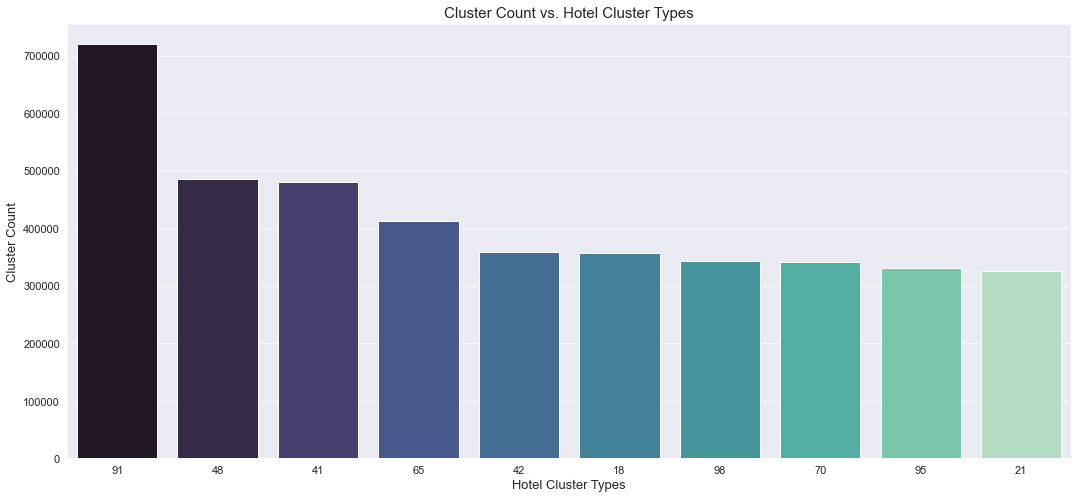

In [14]:
##########################################################################################################################################################################################################################################################

# Make a barchart to see the hotel cluster distributions for only the Top 10.
fig,ax = plt.subplots(1, 1, figsize = (18,8))
sns.barplot(x = top_hotel_clusters['hotel_cluster'][:10].astype('str'), y = 'count', data = top_hotel_clusters[:10], palette = 'mako', ax = ax);
ax.set_title('Cluster Count vs. Hotel Cluster Types', fontsize = 15);
ax.set_xlabel('Hotel Cluster Types', fontsize = 13);
ax.set_ylabel('Cluster Count', fontsize = 13);
ax.tick_params(axis = 'both', which = 'major', labelsize = 11)

##########################################################################################################################################################################################################################################################

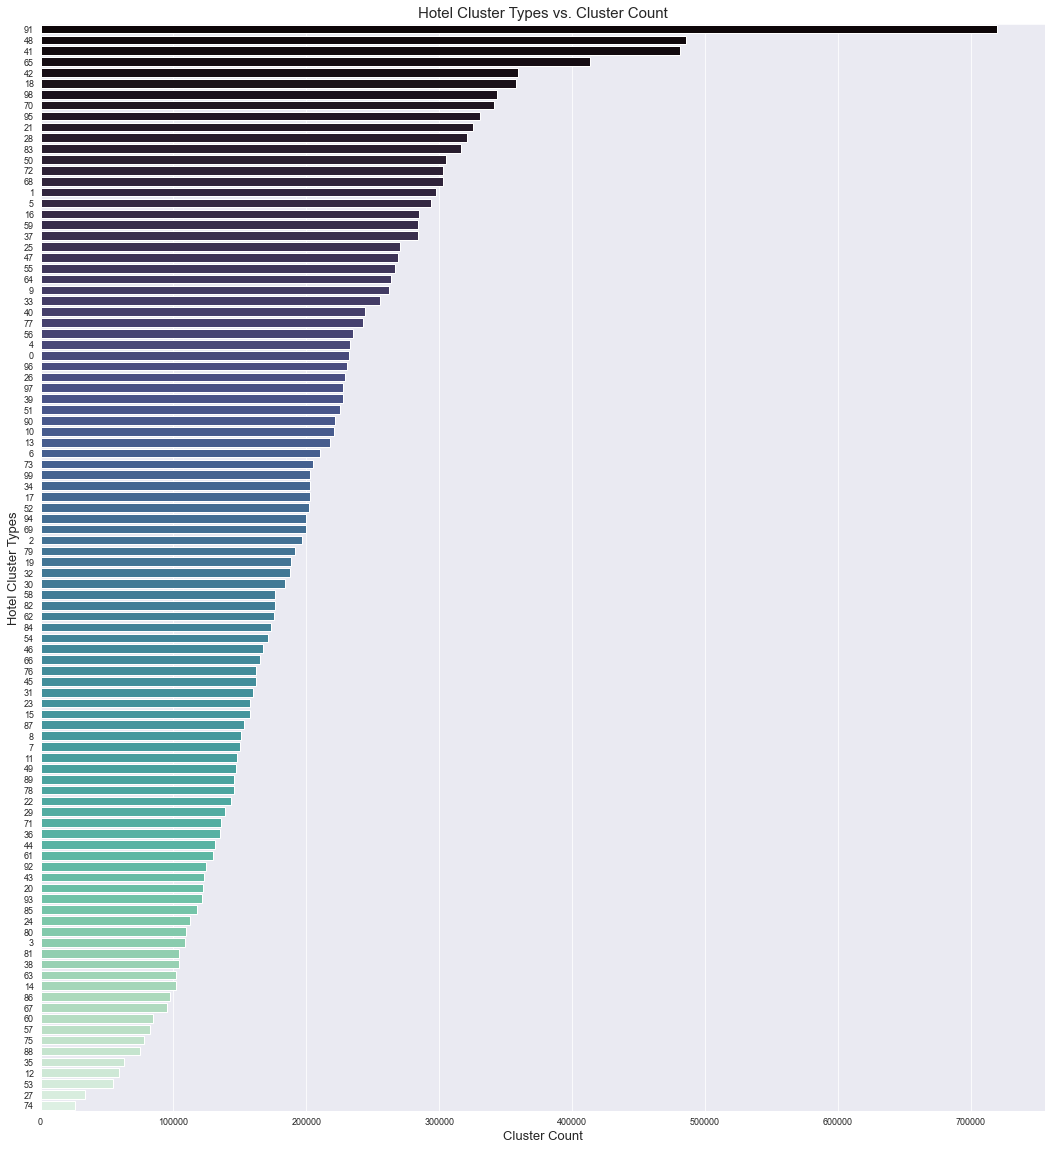

In [15]:
##########################################################################################################################################################################################################################################################

# Make a barchart to see the hotel cluster distributions from 0 to 99 (all 100 of them).
fig,ax = plt.subplots(1, 1, figsize = (18,20))
sns.barplot(x = 'count', y = top_hotel_clusters['hotel_cluster'].astype('str'), data = top_hotel_clusters.sort_values(by = 'count', ascending = False).reset_index(), palette = 'mako', ax = ax);
ax.set_title('Hotel Cluster Types vs. Cluster Count', fontsize = 15);
ax.set_xlabel('Cluster Count', fontsize = 13);
ax.set_ylabel('Hotel Cluster Types', fontsize = 13);
ax.tick_params(axis = 'both', which = 'major', labelsize = 9)

##########################################################################################################################################################################################################################################################

In [16]:
##########################################################################################################################################################################################################################################################

# Clearly, the Top 10 hotel_cluster types by sheer popularity are [91, 48, 41, 65, 42, 18, 98, 70, 95, 21].
# Trim out anything else from train_viz_df that are not part of that.

# Define the top hotel cluster by their index. 
# Create a new dataframe to house the subsets that are of those hotel cluster indices.
top_hotel_cluster_list = list(top_hotel_clusters.hotel_cluster[:10])
top_hotel_cluster_subset_df = pd.DataFrame(columns = list(train_viz_df.columns))

# For the hotel cluster index in the Top 10 of the hotel cluster indices:
for cluster in top_hotel_cluster_list:
    
    # Take only the rows that belong to those hotel cluster indices.
    cluster_subset = train_viz_df[train_viz_df.hotel_cluster == cluster]
    
    # Append those relevant hotel cluster row samples to the subsetted dataframe.
    top_hotel_cluster_subset_df = top_hotel_cluster_subset_df.append(cluster_subset)

# Call the dataframe for the Top 10 hotel clusters segment of the whole training sample.
train_cluster_viz_df = pd.DataFrame(top_hotel_cluster_subset_df).drop_duplicates(inplace = False)

# Ensure the data type of the hotel_cluster is going to be categorical.
# This will ensure the boxplot does plot the entire scale later.
# Note that changing this to a 'category' will still not work - Seaborn will assume it to be a categorical on a numeric scale of sorts.
# You must transfer this to be some 'str' string value to ensure that it plot the hotel cluster category out of a scale formation on an axis.
train_cluster_viz_df.hotel_cluster = train_cluster_viz_df.hotel_cluster.astype('str')

# Reset the indices of the visualizations dataframe to ensure row sample order.
train_cluster_viz_df = train_cluster_viz_df.reset_index(drop = True)

# Show the results.
train_cluster_viz_df

##########################################################################################################################################################################################################################################################

,user_id,trip_distances,trip_durations,search_advances,search_timestamp,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,rooms,hotel_cluster,booking_outcome
0,1482,2104.9654,1,21.0,2014-08-16 19:44:47,2014-09-07,2014-09-08,3,0,3,1,91,0
1,4539,5768.0730,3,271.0,2013-11-20 10:48:41,2014-08-19,2014-08-22,2,2,4,1,91,0
2,4539,5761.2438,3,270.0,2013-11-21 11:13:27,2014-08-19,2014-08-22,2,2,4,1,91,0
3,4539,5761.2438,3,270.0,2013-11-21 11:15:09,2014-08-19,2014-08-22,2,2,4,1,91,1
4,7783,342.6650,1,0.0,2013-06-17 09:31:17,2013-06-18,2013-06-19,1,0,1,1,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157227,1187111,1900.7382,1,31.0,2014-02-10 17:47:56,2014-03-14,2014-03-15,2,1,3,1,21,1
4157228,1189279,1958.5743,3,94.0,2013-03-29 19:07:08,2013-07-02,2013-07-05,2,0,2,1,21,0
4157229,1190379,1434.8426,2,71.0,2013-04-17 20:28:04,2013-06-28,2013-06-30,2,0,2,1,21,0
4157230,1197027,3625.3148,7,21.0,2014-11-23 15:53:48,2014-12-15,2014-12-22,2,0,2,1,21,0


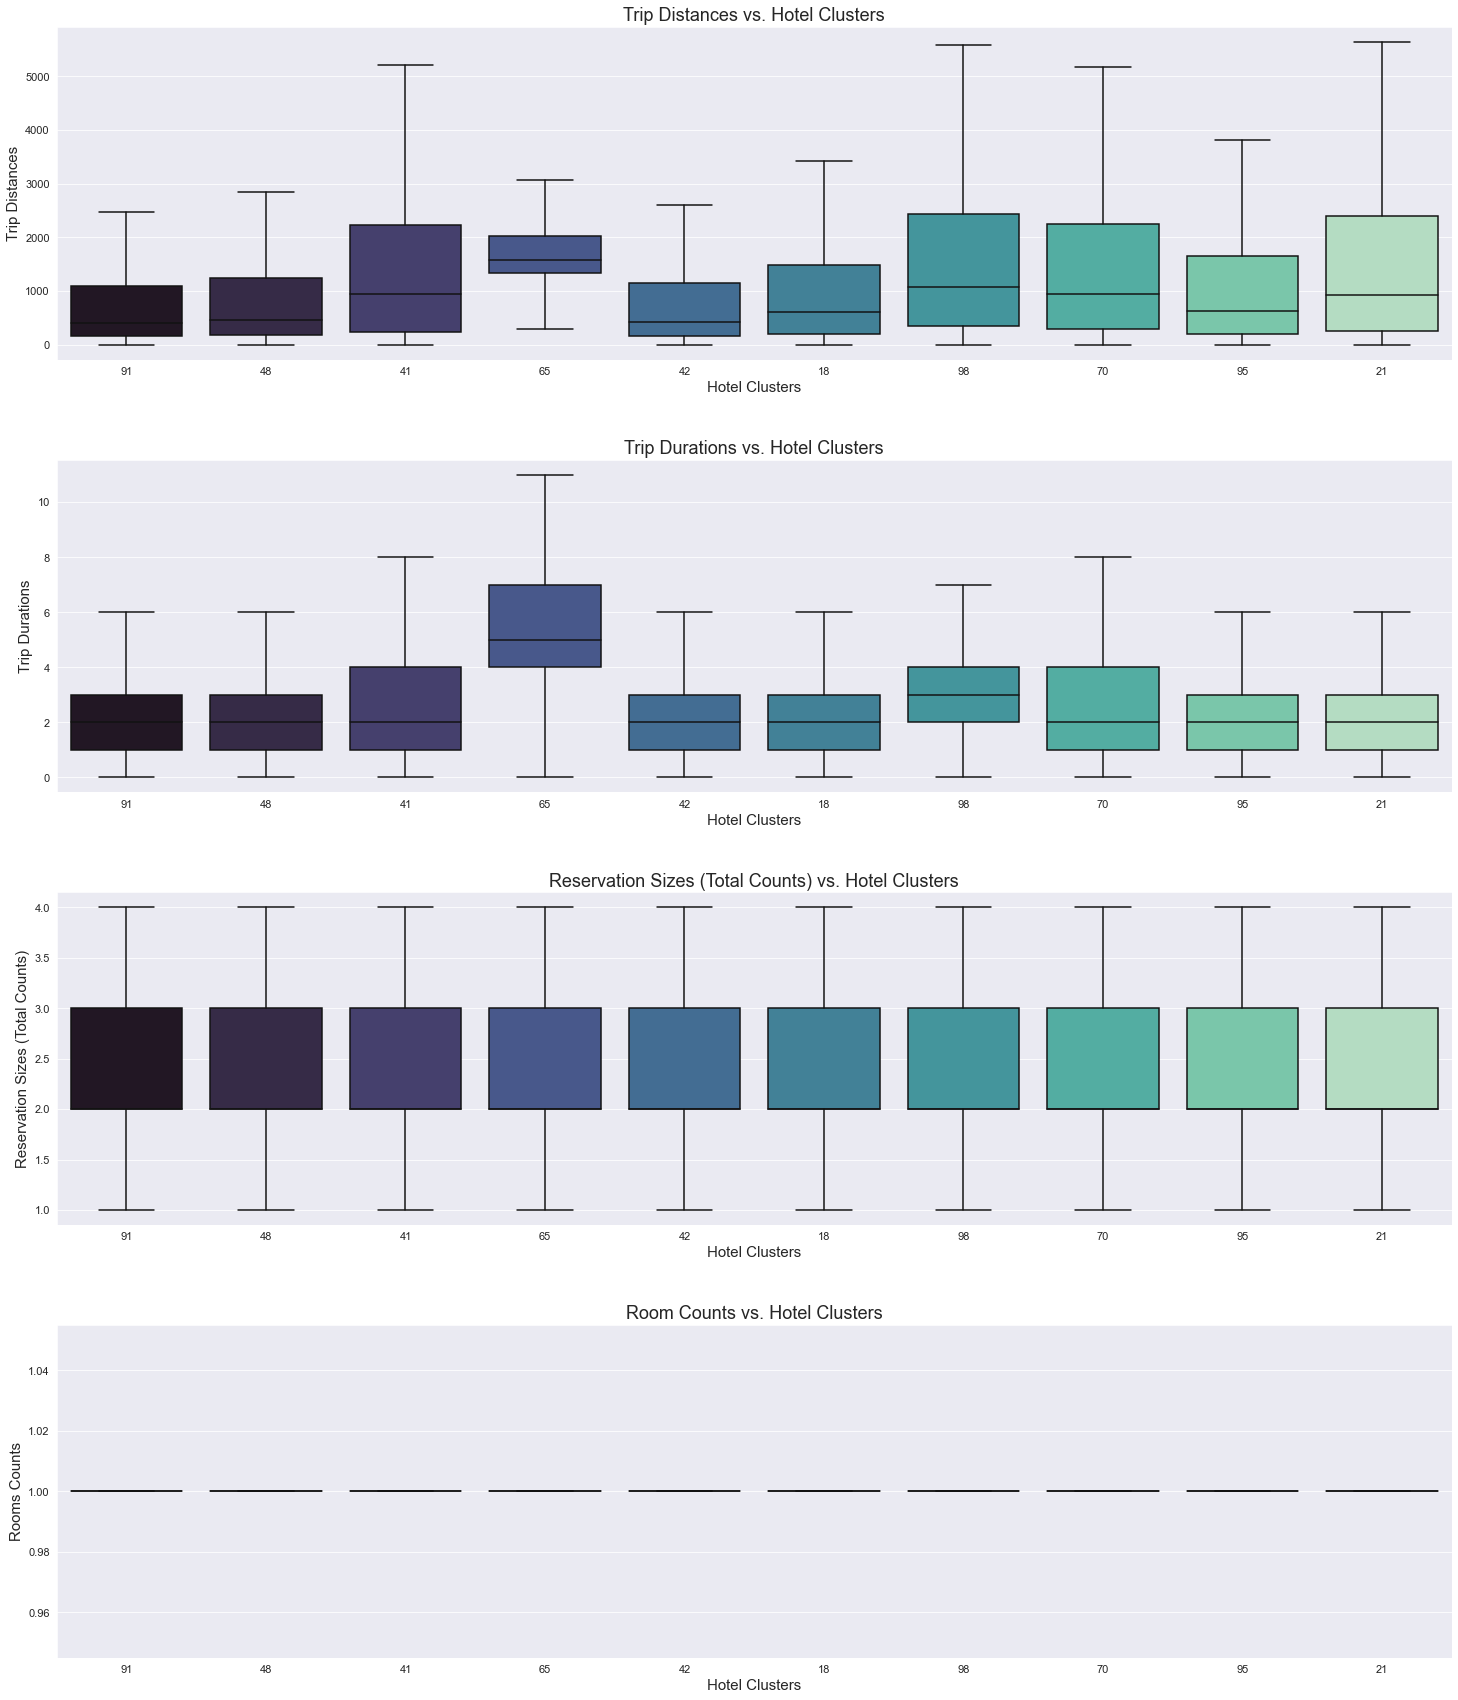

In [17]:
##########################################################################################################################################################################################################################################################

### *** View the general distribution trends between top hotel clusters vs. (trip_distances + trip_durations).
### This will show the Top 10 clusters segment against certain value features (i.e. trip_distances, trip_durations, total_counts, etc.)

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(4, 1, figsize = (25,30))
plt.subplots_adjust(hspace = 0.3)

# Boxplot 1: Training Hotel Clusters vs. Trip Distances. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'trip_distances', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Trip Distances vs. Hotel Clusters', fontsize = 18);
ax[0].set_xlabel('Hotel Clusters', fontsize = 15); 
ax[0].set_ylabel('Trip Distances', fontsize = 15);
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 11);

# Boxplot 2: Training Hotel Clusters vs. Trip Durations. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'trip_durations', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Trip Durations vs. Hotel Clusters', fontsize = 18);
ax[1].set_xlabel('Hotel Clusters', fontsize = 15);
ax[1].set_ylabel('Trip Durations', fontsize = 15);
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 11);

##########################################################################################################################################################################################################################################################

# Boxplot 3: Training Hotel Clusters vs. Reservation Sizes. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'total_count', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[2]);
ax[2].set_title('Reservation Sizes (Total Counts) vs. Hotel Clusters', fontsize = 18);
ax[2].set_xlabel('Hotel Clusters', fontsize = 15); 
ax[2].set_ylabel('Reservation Sizes (Total Counts)', fontsize = 15);
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 11);

# Boxplot 4: Training Hotel Clusters vs. Room Counts. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'rooms', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[3]);
ax[3].set_title('Room Counts vs. Hotel Clusters', fontsize = 18);
ax[3].set_xlabel('Hotel Clusters', fontsize = 15);
ax[3].set_ylabel('Rooms Counts', fontsize = 15);
ax[3].tick_params(axis = 'both', which = 'major', labelsize = 11);

### There is very little distributive variation for the party sizes and room counts across the different Top 10 clusters.
### Try to make barplots/histograms for these to see how visually different they are from each other. Differences should still be minimal by comparisons.

##########################################################################################################################################################################################################################################################

In [18]:
##########################################################################################################################################################################################################################################################

# Aggregate the mean out of each total_count per hotel_cluster. This will tell you a general reservation size per hotel cluster.
total_count_agg_df = train_cluster_viz_df[['hotel_cluster', 'total_count']].groupby('hotel_cluster', as_index = False).agg(['mean'])

# Rename the column to get rid of the multi-index for the mean and total_count that comes after aggregating.
total_count_agg_df.columns = ['total_count_mean']

# Make a new column called hotel_cluster to house the aggregated indices, which will be the cluster types.
total_count_agg_df['hotel_cluster'] = total_count_agg_df.index

# Make the index the length of the aggregated dataframe.
total_count_agg_df.index = range(0,len(total_count_agg_df))

# Reorder the columns of the aggregated dataframe.
total_count_agg_df = total_count_agg_df[['hotel_cluster', 'total_count_mean']]

# Show the aggregated dataframe.
display(total_count_agg_df[['hotel_cluster', 'total_count_mean']].T)

##########################################################################################################################################################################################################################################################

# Aggregate the mean out of each room count per hotel_cluster. This will tell you a general rooms reserved count per hotel cluster.
rooms_agg_df = train_cluster_viz_df[['hotel_cluster', 'rooms']].groupby('hotel_cluster', as_index = False).agg(['mean'])

# Rename the column to get rid of the multi-index for the mean and total_count that comes after aggregating.
rooms_agg_df.columns = ['rooms_mean']

# Make a new column called hotel_cluster to house the aggregated indices, which will be the cluster types.
rooms_agg_df['hotel_cluster'] = rooms_agg_df.index

# Make the index the length of the aggregated dataframe.
rooms_agg_df.index = range(0,len(rooms_agg_df))

# Reorder the columns of the aggregated dataframe.
rooms_agg_df = rooms_agg_df[['hotel_cluster', 'rooms_mean']]

# Show the aggregated dataframe.
display(rooms_agg_df[['hotel_cluster', 'rooms_mean']].T)

##########################################################################################################################################################################################################################################################

,0,1,2,3,4,5,6,7,8,9
hotel_cluster,18,21,41,42,48,65,70,91,95,98
total_count_mean,2.437613,2.323664,2.341616,2.477749,2.421712,2.621235,2.315445,2.525245,2.340759,2.400088


,0,1,2,3,4,5,6,7,8,9
hotel_cluster,18,21,41,42,48,65,70,91,95,98
rooms_mean,1.112807,1.110054,1.084161,1.11535,1.120439,1.107493,1.096353,1.115591,1.109575,1.104358


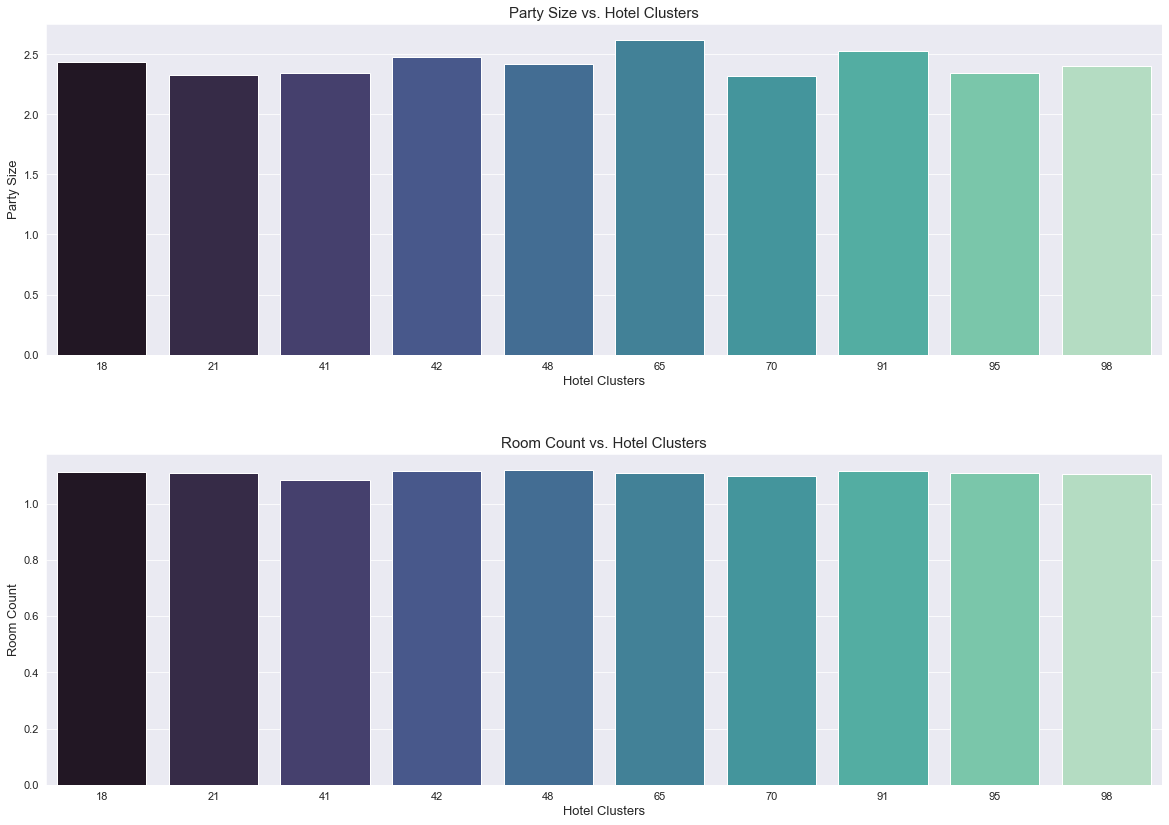

In [19]:
##########################################################################################################################################################################################################################################################

# Set up the figure size.
fig,ax = plt.subplots(2,1,figsize = (20,14))
plt.subplots_adjust(hspace = 0.3)

# Barplot 1: Training Hotel Clusters vs. Party Size. Negate outliers for now - They distort overall trend visualizations.
sns.barplot(x = 'hotel_cluster', y = 'total_count_mean', data = total_count_agg_df, palette = 'mako', ax = ax[0]);
ax[0].set_title('Party Size vs. Hotel Clusters', fontsize = 15);
ax[0].set_xlabel('Hotel Clusters', fontsize = 13);
ax[0].set_ylabel('Party Size', fontsize = 13);
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 11);

# Barplot 2: Training Hotel Clusters vs. Room Count. Negate outliers for now - They distort overall trend visualizations.
sns.barplot(x = 'hotel_cluster', y = 'rooms_mean', data = rooms_agg_df, palette = 'mako', ax = ax[1]);
ax[1].set_title('Room Count vs. Hotel Clusters', fontsize = 15);
ax[1].set_xlabel('Hotel Clusters', fontsize = 13);
ax[1].set_ylabel('Room Count', fontsize = 13);
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 11);

##########################################################################################################################################################################################################################################################

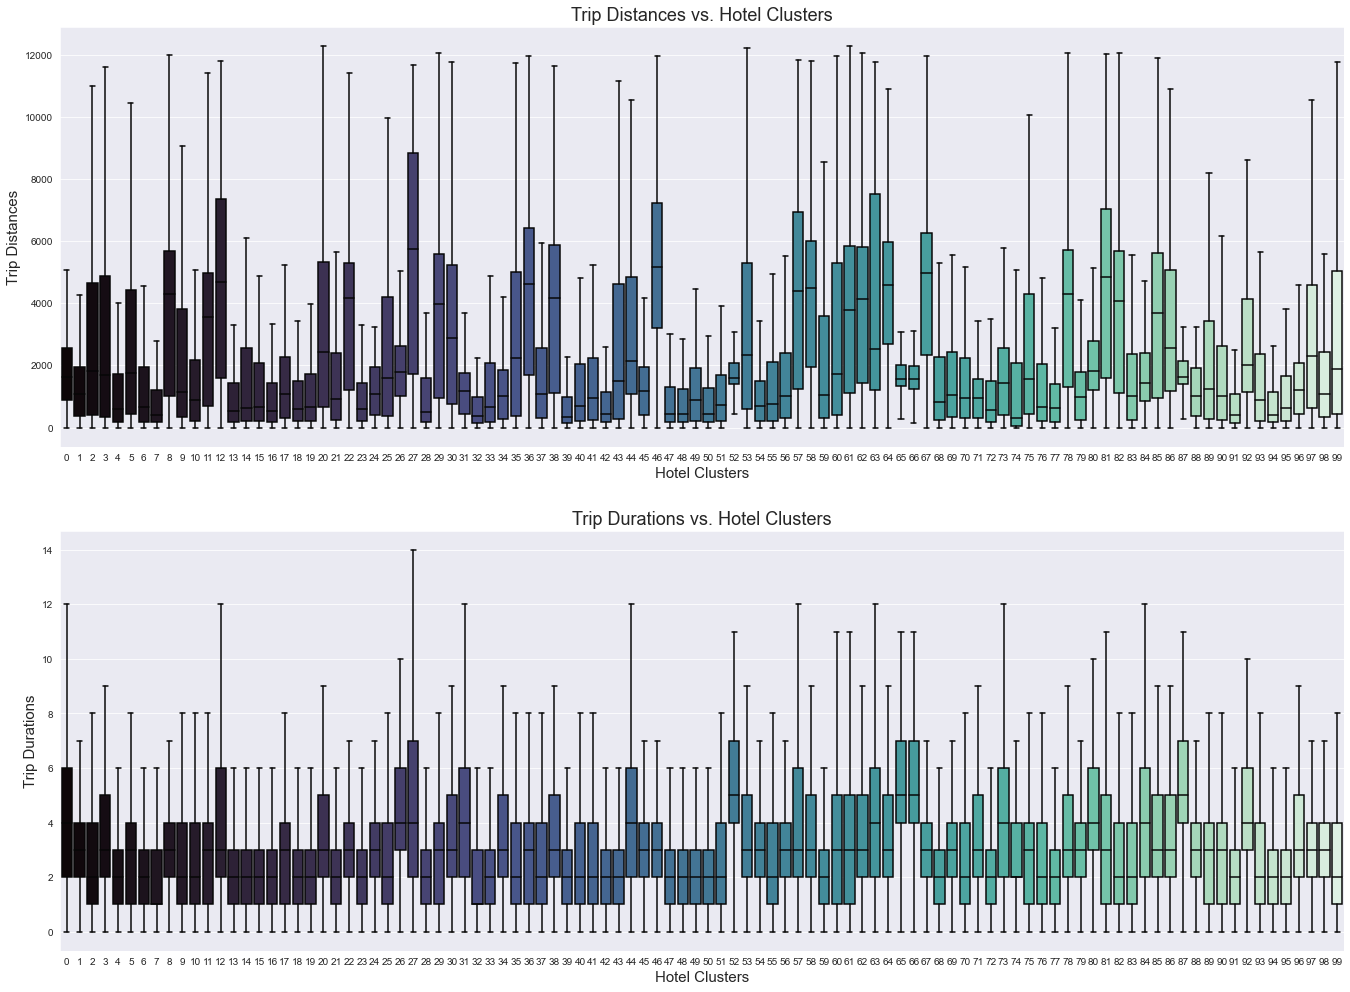

In [20]:
##########################################################################################################################################################################################################################################################

### *** View the general distribution trends between top hotel clusters vs. (trip_distances + trip_durations).
### This will show all clusters segment against certain value features (i.e. trip_distances, trip_durations, total_counts, etc.)

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(2, 1, figsize = (23,17))
plt.subplots_adjust(hspace = 0.2)

### Barplot 1: Show the Training Hotel Clusters vs. Trip Distances Plot.
#   Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'trip_distances', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Trip Distances vs. Hotel Clusters', fontsize = 18);
ax[0].set_xlabel('Hotel Clusters', fontsize = 15);
ax[0].set_ylabel('Trip Distances', fontsize = 15);
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 10)

### Barplot 2: Show the Training Hotel Clusters vs. Trip Durations Plot.
#   Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'hotel_cluster', y = 'trip_durations', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Trip Durations vs. Hotel Clusters', fontsize = 18);
ax[1].set_xlabel('Hotel Clusters', fontsize = 15);
ax[1].set_ylabel('Trip Durations', fontsize = 15);
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 10)

##########################################################################################################################################################################################################################################################

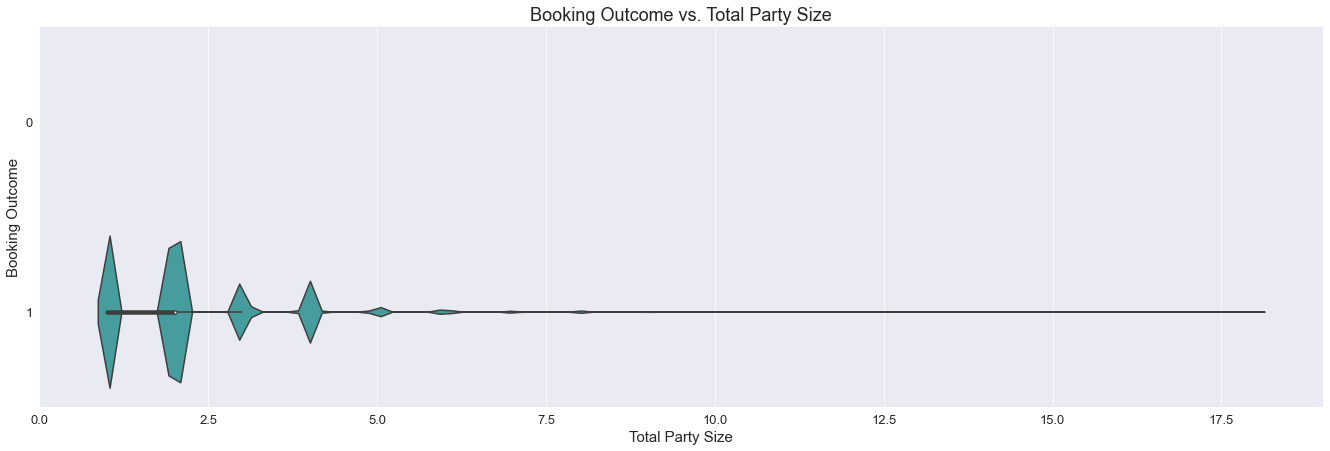

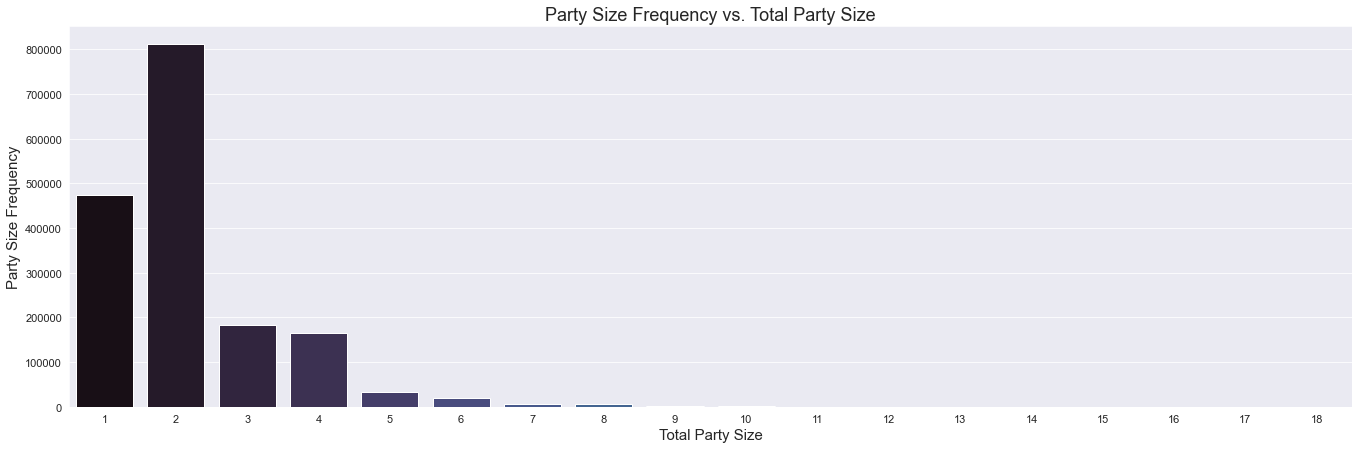

In [21]:
##########################################################################################################################################################################################################################################################

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 1, figsize = (23,7))

# Focus on the trends of the booked instances with an actual party size count (i.e. not 0, that's not a correct entry).
booked_party_size_df = train_viz_df[(train_viz_df.booking_outcome == 1) & (train_viz_df.total_count > 0)]

# Boxplot 3: Training Booking Outcomes vs. Total Count (i.e. all humans in the transactions).
# Get rid of outliers, they aren't helpful.
sns.violinplot(x = 'total_count', y = 'booking_outcome', data = booked_party_size_df, palette = 'mako', showfliers = False, ax = ax);
ax.set_title('Booking Outcome vs. Total Party Size', fontsize = 18);
ax.set_xlabel('Total Party Size', fontsize = 15);
ax.set_ylabel('Booking Outcome', fontsize = 15);
ax.tick_params(axis = 'both', which = 'major', labelsize = 13)

# Make a dataframe to describe the count distribution of party size buckets.
booked_party_size_dist_df = train_viz_df[(train_viz_df.booking_outcome == 1) & (train_viz_df.total_count > 0)].total_count.value_counts().rename_axis('total_count').reset_index(name = 'counts')

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 1, figsize = (23,7))

# Generate a barplot to show the distributions by party sizes. Do you think this will be a relevant feature to include?
sns.barplot(x = 'total_count', y = 'counts', data = booked_party_size_dist_df, palette = 'mako', ax = ax);
ax.set_title('Party Size Frequency vs. Total Party Size', fontsize = 18);
ax.set_xlabel('Total Party Size', fontsize = 15);
ax.set_ylabel('Party Size Frequency', fontsize = 15);
ax.tick_params(axis = 'both', which = 'major', labelsize = 11)

# Most of the booking travelers are lone travelers. The rest are paired travelers. 
# These are small party sizes that are booking.

##########################################################################################################################################################################################################################################################

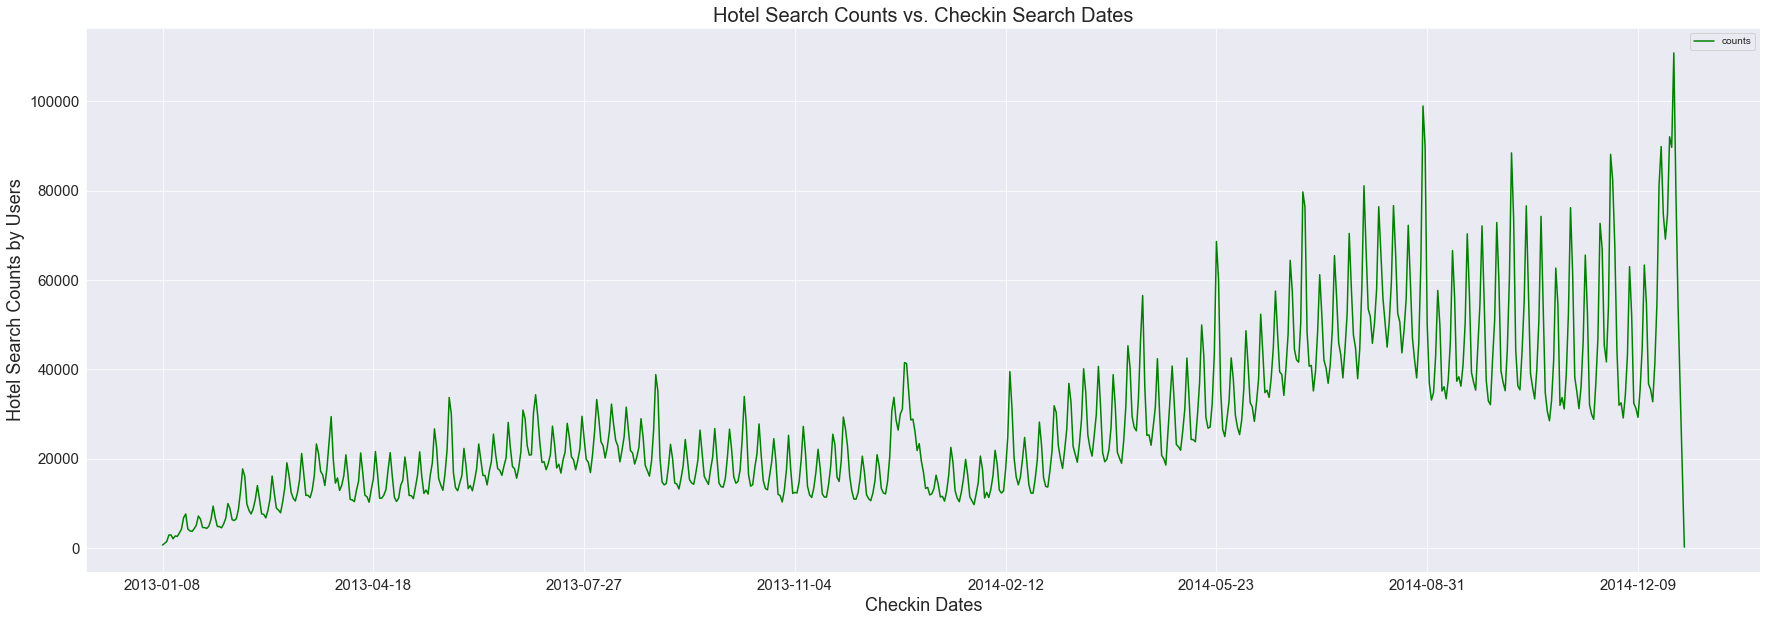

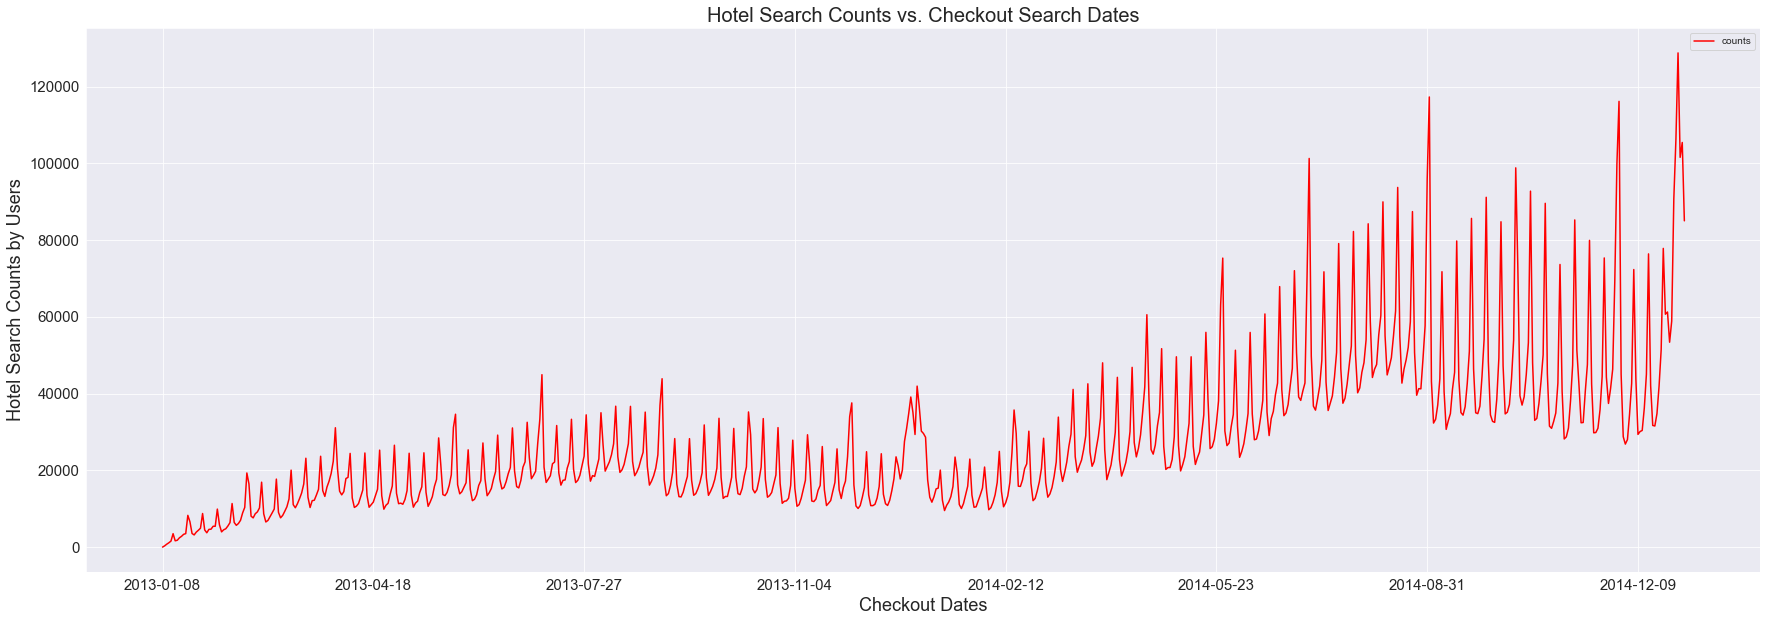

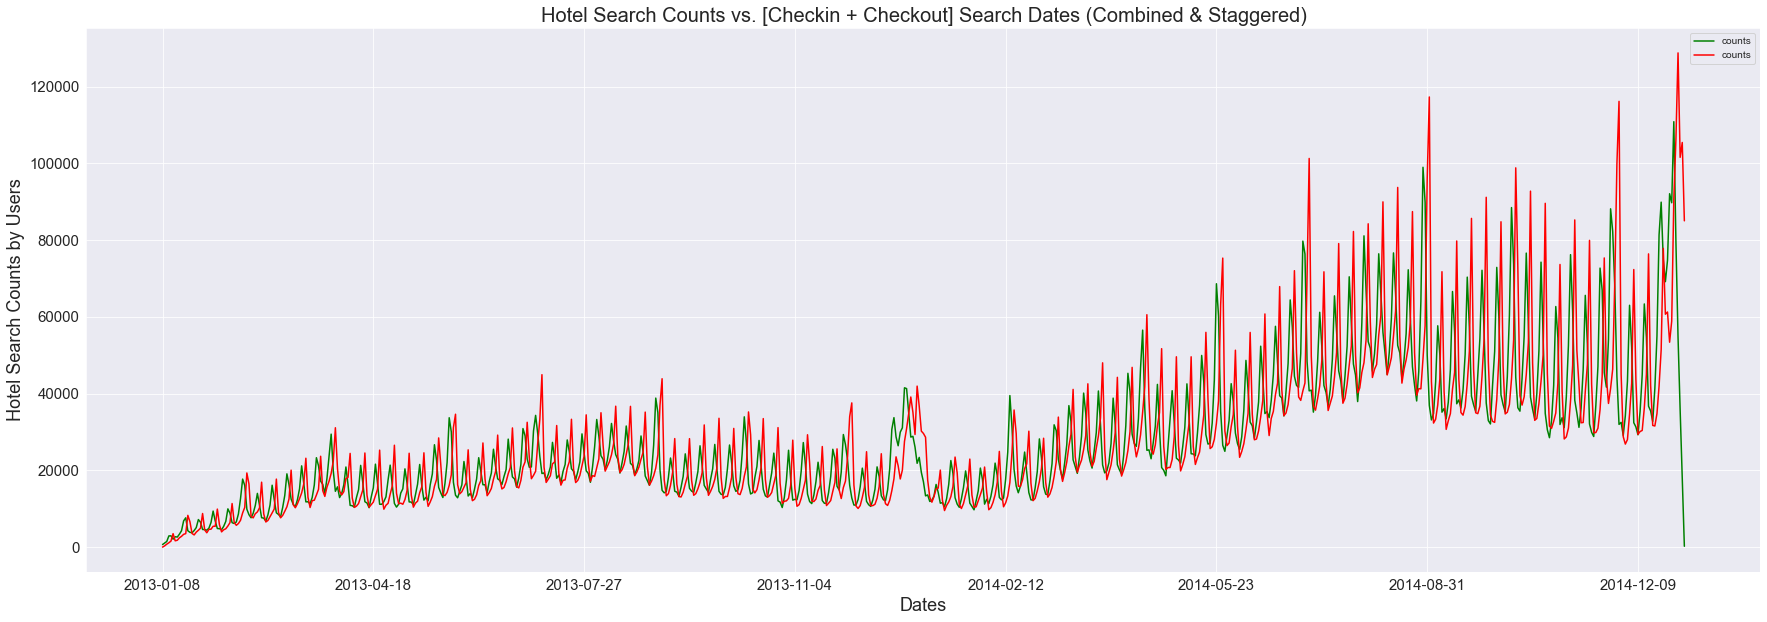

In [305]:
##########################################################################################################################################################################################################################################################

# Return a basic dataframe for the time series values for the instance counts per date. 
# Make a series for checkin times. 
time_series_checkin_df = train_viz_df['checkin_timestamp'].value_counts().rename_axis('checkin_timestamp').reset_index(name = 'counts').sort_values(by = 'checkin_timestamp').reset_index(drop = True)
time_series_checkin_df.index = time_series_checkin_df.checkin_timestamp
time_series_checkin_df = time_series_checkin_df.drop(columns = 'checkin_timestamp')

# Make a series for checkout times. 
time_series_checkout_df = train_viz_df['checkout_timestamp'].value_counts().rename_axis('checkout_timestamp').reset_index(name = 'counts').sort_values(by = 'checkout_timestamp').reset_index(drop = True)
time_series_checkout_df.index = time_series_checkout_df.checkout_timestamp
time_series_checkout_df = time_series_checkout_df.drop(columns = 'checkout_timestamp')

### Let's take a quick look at past seasonality trends.
#   Most travel usually happens when there are promotions around holidays (i.e. Autumn, Winter) or hospital seaons (i.e. Spring, Summer, etc.).

# Set up the grid size for the figure.
fig, ax = plt.subplots(1,1,figsize = (30,10))
plt.subplots_adjust(hspace = 0.2)

# Run the time series visualizations for the checkin times.
time_series_checkin_df.plot(ax = ax, color = 'g', grid = True);
ax.set_title('Hotel Search Counts vs. Checkin Search Dates', fontsize = 20);
ax.set_xlabel('Checkin Dates', fontsize = 18); 
ax.set_ylabel('Hotel Search Counts by Users', fontsize = 18);
ax.tick_params(axis = 'both', which = 'major', labelsize = 15);

# Set up the grid size for the figure.
fig, ax = plt.subplots(1,1,figsize = (30,10))
plt.subplots_adjust(hspace = 0.2)

# Run the time series visualizations for the checkout times.
time_series_checkout_df.plot(ax = ax, color = 'r', grid = True);
ax.set_title('Hotel Search Counts vs. Checkout Search Dates', fontsize = 20);
ax.set_xlabel('Checkout Dates', fontsize = 18); 
ax.set_ylabel('Hotel Search Counts by Users', fontsize = 18);
ax.tick_params(axis = 'both', which = 'major', labelsize = 15);

# Set up the grid size for the figure.
fig, ax = plt.subplots(1,1,figsize = (30,10))
plt.subplots_adjust(hspace = 0.2)

# Run the time series visualizations for the checkin times.
time_series_checkin_df.plot(ax = ax, color = 'g', grid = True);
time_series_checkout_df.plot(ax = ax, color = 'r', grid = True);
ax.set_title('Hotel Search Counts vs. [Checkin + Checkout] Search Dates (Combined & Staggered)', fontsize = 20);
ax.set_xlabel('Dates', fontsize = 18); 
ax.set_ylabel('Hotel Search Counts by Users', fontsize = 18);
ax.tick_params(axis = 'both', which = 'major', labelsize = 15);

# There is seasonality, where you see more hotel locations searched during the summer and holiday months for each year.

##########################################################################################################################################################################################################################################################

#### `Part F.` Cleanse the Training Set Again. Check for NaN values. Delete and/or Impute to Accommodate Null Discrepancies.

In [23]:
##########################################################################################################################################################################################################################################################

# Are there NaN values in the initial training set?
nan_columns_train = pd.DataFrame({'column_names': train.isna().sum().index,
                                  'null_counts': train.isna().sum().tolist()})

# View the resulting table. This will tell you where NaN values exist in the training set.
# There are only 3 columns with NaN in the training set: 
# orig_destination_distance (origin to destination distance), srch_ci (search city), srch_co (search country).
# Notice that there are no null values in srch_destination_id, which means this should merge with the destination dataframe key later.

# orig_destination_distance is comprised of (13525001 / len(train)) * 100 = 35.9% NaN
# srch_ci is comprised of (47083 / len(train)) * 100 = 0.125% NaN
# srch_co is comprised of (47084 / len(train)) * 100 = 0.125% NaN

# Observe the NaN outcomes of the original training set.
# Consider dropping orig_destination_distance by column axis.
# Consider dropping srch_ci and srch_co by row axis. 
print(f'\n\033[1mNaN Values in the Initial Training Set:\033[0m')
nan_columns_train

##########################################################################################################################################################################################################################################################


NaN Values in the Initial Training Set:


,column_names,null_counts
0,date_time,0
1,site_name,0
2,posa_continent,0
3,user_location_country,0
4,user_location_region,0
5,user_location_city,0
6,orig_destination_distance,13525001
7,user_id,0
8,is_mobile,0
9,is_package,0


In [24]:
##########################################################################################################################################################################################################################################################

# Generate a function to also automate the NaN percentages in columns with NaN. 
# There should be three columns in the training set returned from this function.
def get_cols_with_nas_percent_rows(df):
    
    # This will be the results list.
    results = []
    
    # Grab the NaN total in the dataframe and sum by rows. This will collapse it to the total NaN defined in columns. 
    # Divide by number of rows, this should return the percentage of row samples that are NaN by columns. 
    df_nas = df.isna().sum(axis = 0)/df.shape[0]
    
    # For the item and values in the aggregation for percentage NaN dataframe:
    for item, value in df_nas.items():
        
        # Take the values where there is an NaN present.
        if value > 0:
            
            # Append that to the results.
            results.append((item, value))
            
    # Return the results list. 
    return results

# Explain what this is.
print('\n\033[1mPercentage of NaN per Initial Training Set Column (for Columns containing NaN):\033[0m\n')

# Execute this the NaN aggregating function for the training set. 
# This should match the results shown above as well. 
for feature_tuple in get_cols_with_nas_percent_rows(train):
    print(f'\nThe \033[1m{feature_tuple[0]} column\033[0m has \033[1m{np.round((feature_tuple[1]*100),3)}% NaN\033[0m.\n')

##########################################################################################################################################################################################################################################################


Percentage of NaN per Initial Training Set Column (for Columns containing NaN):


The orig_destination_distance column has 35.904% NaN.


The srch_ci column has 0.125% NaN.


The srch_co column has 0.125% NaN.



In [25]:
##########################################################################################################################################################################################################################################################

# Generate a function to also automate the NaN percentages through the entire training set dataframe.
# This is a higher level measurement than the returned values from get_cols_with_nas_percent_rows(df).
def get_percent_cols_with_nas(df):
    
    # Set up a count value starting at 0.
    count = 0
    
    # For the item and values in the aggregation for percentage NaN dataframe:
    for item, value in df.isna().sum().items():
        
        # Take the values where there is an NaN present.
        if value > 0:
            
            # Increase count by 1 if there is NaN present.
            count += 1
    
    # Return the count of columns and divide by the total columns available.
    # This will be the percentage of columns with nulls.
    return count/len(df.columns)

# Explain what this is.
print('\n\033[1mPercentage of NaN columns in Initial Training Set Dataframe:\033[0m\n')

# Execute this the NaN aggregating function for the training set dataframe. 
training_nan_pct = get_percent_cols_with_nas(train)
print(f'\nThe \033[1mtraining set column set\033[0m contains \033[1m{np.round((training_nan_pct*100),3)}% NaN\033[0m.\n')

##########################################################################################################################################################################################################################################################


Percentage of NaN columns in Initial Training Set Dataframe:


The training set column set contains 12.5% NaN.



In [26]:
##########################################################################################################################################################################################################################################################

# How many NaN values are in the current cleansed training set version with filtered dates and duration columns?
# There should be none. Since there are no NaN values here and the sample is still large (i.e. 20M+), we can use this as development data still.
print(f'\n\033[1mNaN Values in the Cleansed Visualizations Dataset:\033[0m')
display(pd.DataFrame(train_viz_df.isna().sum().rename_axis('column_names').reset_index(name = 'null_counts')))
print(f'\n\033[1mShape of the Cleansed Dataset for Visualizations:\033[0m\n\n{train_viz_df.shape}\n')

##########################################################################################################################################################################################################################################################


NaN Values in the Cleansed Visualizations Dataset:


,column_names,null_counts
0,user_id,0
1,trip_distances,0
2,trip_durations,0
3,search_advances,0
4,search_timestamp,0
5,checkin_timestamp,0
6,checkout_timestamp,0
7,adult_count,0
8,child_count,0
9,total_count,0



Shape of the Cleansed Dataset for Visualizations:

(20250656, 13)



In [27]:
##########################################################################################################################################################################################################################################################

# Unique values per column.
unique_types = []

# Unique value counts per column.
unique_types_count = []

# The column name in the training set:
for column_name in list(train.columns):
    
    # Append the unique counts per column.
    unique_types.append(train[column_name].unique())
    unique_types_count.append(len(train[column_name].unique()))
    
# Generate a dataset to view the unique values per column.
# If the categorical (numeric indexed) features are too high (i.e. above 100), don't bother encoding, just delete.
# Keep only the columns where the number of categical feature with numeric indices are within reasonable range for encoding later as development data.
feature_types_df = pd.DataFrame({'feature': train.columns, 
                                 'unique_types': unique_types,
                                 'unique_type_total': unique_types_count})

# Show the feature types and their count per categorical type (via numeric indexing).
# Which ones are reasonable to encode for the sake of computational efficiency?
feature_types_df

##########################################################################################################################################################################################################################################################

,feature,unique_types,unique_type_total
0,date_time,"[2014-08-11 07:46:59, 2014-08-11 08:22:12, 201...",25419546
1,site_name,"[2, 30, 37, 24, 25, 13, 11, 33, 17, 10, 34, 26...",45
2,posa_continent,"[3, 4, 1, 2, 0]",5
3,user_location_country,"[66, 195, 69, 3, 55, 23, 46, 205, 194, 133, 18...",237
4,user_location_region,"[348, 442, 189, 318, 548, 991, 462, 311, 174, ...",1008
5,user_location_city,"[48862, 35390, 10067, 22418, 52078, 21655, 529...",50447
6,orig_destination_distance,"[2234.2641, 913.1932, 913.6259, 911.5142, nan,...",8495290
7,user_id,"[12, 93, 501, 756, 776, 1048, 1482, 1561, 1713...",1198786
8,is_mobile,"[0, 1]",2
9,is_package,"[1, 0]",2


In [28]:
##########################################################################################################################################################################################################################################################

# Keep these columns to merge, then encode. Set a threshold of 100 unique types in a feature.
# Anything beyond 1000 could become a computational strain for scaling purposes.
# If cardinality per feature is not too high, one-hot encode those categorical types.
print('\n\033[1mReasonable Training Features to Keep for One-Hot Encoding & Later Merging:\033[0m')
kept_features_ohe = feature_types_df[feature_types_df.unique_type_total <= 1000]
display(kept_features_ohe)

# Approximately, we'd expect these features to expand this much via encoding:
print(f'\n\033[1mAnticipated Features Count after Encoding:\033[0m {np.sum(kept_features_ohe.unique_type_total)}\n')

##########################################################################################################################################################################################################################################################


Reasonable Training Features to Keep for One-Hot Encoding & Later Merging:


,feature,unique_types,unique_type_total
1,site_name,"[2, 30, 37, 24, 25, 13, 11, 33, 17, 10, 34, 26...",45
2,posa_continent,"[3, 4, 1, 2, 0]",5
3,user_location_country,"[66, 195, 69, 3, 55, 23, 46, 205, 194, 133, 18...",237
8,is_mobile,"[0, 1]",2
9,is_package,"[1, 0]",2
10,channel,"[9, 3, 2, 4, 1, 0, 7, 5, 6, 8, 10]",11
13,srch_adults_cnt,"[2, 1, 3, 4, 5, 8, 9, 0, 6, 7]",10
14,srch_children_cnt,"[0, 2, 3, 1, 5, 4, 9, 7, 6, 8]",10
15,srch_rm_cnt,"[1, 2, 3, 4, 5, 8, 0, 7, 6]",9
17,srch_destination_type_id,"[1, 6, 4, 8, 3, 7, 5, 9, 0, 2]",10



Anticipated Features Count after Encoding: 767



In [29]:
##########################################################################################################################################################################################################################################################

# Retain these column names from the training set. 
# Remember into incluse the user_id, this is how we will join the columns to the cleansed visualization set train_viz_df.
kept_features_ohe_list = ['user_id'] + list(kept_features_ohe.feature.unique())
display(np.array(kept_features_ohe_list))

# Compare this to the train_viz_df columns. 
# Which features did we already use and do not need to join in?
display(np.array(train_viz_df.columns))

# From the initial train, the features we will still need to do the correct merge are:
# -> ['user_id', 'site_name', 'posa_continent', 'user_location_country', 'is_mobile', 'is_package', 'channel', 'srch_destination_type_id', 'cnt', 'hotel_continent', 'hotel_country']
train_retained_df = train[['user_id', 'site_name', 'posa_continent', 'user_location_country', 'is_mobile', 'is_package', 'channel', 'srch_destination_type_id', 'cnt', 'hotel_continent', 'hotel_country']]

# Remove all duplicates. You won't need them in the next merge phases.
train_retained_df = train_retained_df.drop_duplicates()

# Show the train_retained_df dataframe.
display(train_retained_df)

##########################################################################################################################################################################################################################################################

array(['user_id', 'site_name', 'posa_continent', 'user_location_country',
       'is_mobile', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country',
       'hotel_cluster'], dtype='<U24')

array(['user_id', 'trip_distances', 'trip_durations', 'search_advances',
       'search_timestamp', 'checkin_timestamp', 'checkout_timestamp',
       'adult_count', 'child_count', 'total_count', 'rooms',
       'hotel_cluster', 'booking_outcome'], dtype=object)

,user_id,site_name,posa_continent,user_location_country,is_mobile,is_package,channel,srch_destination_type_id,cnt,hotel_continent,hotel_country
0,12,2,3,66,0,1,9,1,3,2,50
1,12,2,3,66,0,1,9,1,1,2,50
2,12,2,3,66,0,0,9,1,1,2,50
3,93,2,3,66,0,0,3,1,1,2,50
6,501,2,3,66,0,0,2,1,2,2,50
...,...,...,...,...,...,...,...,...,...,...,...
37670281,1198182,2,3,66,0,1,0,1,1,2,50
37670282,1198182,2,3,66,0,1,2,1,1,6,169
37670283,1198182,2,3,66,0,0,0,1,2,2,50
37670284,1198182,2,3,66,0,0,0,1,1,2,50


In [30]:
##########################################################################################################################################################################################################################################################

### THIS CODE BLOCK WILL CRASH THE KERNEL AND MACHINE. Do not merge, it is too computationally expensive.

# Instead, proceed to the block below where we will just include the columns shown above.
# The block below will run the same transformations on the training set as above.
# This is to explicitly include the columns of interest expressed during the exploration phase above.
# Those columns will be one-hot encoded later. 

#merge_train = train_viz_df.merge(train_retained_df, on = 'user_id', how = 'left')
#merge_train

##########################################################################################################################################################################################################################################################

<b>`Data Exploration Notes` : </b>


12.5% is not an insignificant number of columns with NaNs, so we shouldn't drop those column.

Regarding the dropping points with NaNs, 35% is a lot of rows and 12% is also not insignificant. But, perhaps see if the distribution of hotel cluster would change if these dropped those rows are dropped.

<br>

<b>`Data Cleansing Intermediate Contemplation` : </b><br>

We should consider dropping the high NaN column orig_destination_distance, which has approximatel 36% null values. We should also do a version where these values are also imputed by target encoding. Note, the relevance of this task will depend on the models we want to choose - For example, for trees, dropping and imputing NaNs has no vast effect on results. 

To improve expand our modeling method selections later, we will just create separate dataframe versions with orig_destination_distance dropped and another where it is imputed. We will be able to access both data structures later when training and test to figure out which formation is idea with respect to orig_destination_distance. Note that the distance magnitude probably WILL have an effect on booking and hotel clustering outcomes, which is why we should keep two versions of this dataframe just in case.


Now, we want to look at the other two columns with NaNs - srch_ci (checkin dates) and srch_co (checkout dates), respectively. These NaN percentages are extremely low (i.e. 0.125% for each), so we can just keep those columns and delete the rows containing NaN in srch_ci and srch_co. This should have negligible impact on the outcome later. Note that we can also just make a new column with values (srch_co - srch_ci) to monitor time durations of visits - If we implement this, we will want to remove srch_ci and srch_co to reduce colinearities.

<b>`Data Cleansing Final Decision` : </b><br>

Due to the computational expense of the immense row samples provided, the NaN rows will simply be removed. Trying to impute, cleanse, merge, and retain all of the data crashes/stalls/hinders the current capacities of our machines. Removal of NaN rows will still supply a vast quantity of samples for modeling purposes later.

To deal with target class imbalances (i.e. in particular to booking outcome) AND to increase computation efficiencies/lower computation expenses, we will downsample the majority class. This should still at yield a very high number set of samples that span into several hundred thousand to low million row count ranges. The downsampled amount will be merged with the destination tokenized text data. Merging without downsampling will crash most personal computers/machines, so ensure to do so before continuing the cleansing process.

#### `Part G.` Finalize the Development Set to be Used for Models. 

In [31]:
##########################################################################################################################################################################################################################################################

# Make a new dataframe taking the relevant columns mentioned above. Run the same conversions and transformations.
train_df = pd.DataFrame({'user_id': train.user_id.astype('category'),
                         'search_region_domain': train.site_name.astype('category'),
                         'search_region_continent': train.posa_continent.astype('category'),
                         'user_location': train.user_location_country.astype('category'),
                         'mobile_search': train.is_mobile.astype('category'),
                         'package_deal': train.is_package.astype('category'),
                         'marketing_channel': train.channel.astype('category'),
                         'destination_id': train.srch_destination_type_id.astype('category'),
                         'similar_search_count': train.cnt.astype('category'),
                         'hotel_continent': train.hotel_continent.astype('category'),
                         'hotel_country': train.hotel_country.astype('category'),
                         'trip_distances': train.orig_destination_distance.astype(float),
                         'search_timestamp': pd.to_datetime(train.date_time, format = '%Y%m%d', errors = 'ignore'),
                         'checkin_timestamp': pd.to_datetime(train.srch_ci, format = '%Y%m%d', errors = 'ignore'),
                         'checkout_timestamp': pd.to_datetime(train.srch_co, format = '%Y%m%d', errors = 'ignore'),
                         'adult_count': train.srch_adults_cnt.astype(int),
                         'child_count': train.srch_children_cnt.astype(int),
                         'total_count': train.srch_adults_cnt.astype(int) + train.srch_children_cnt.astype(int),
                         'rooms': train.srch_rm_cnt.astype(int),
                         'hotel_cluster': train.hotel_cluster.astype('category'),
                         'booking_outcome': train.is_booking.astype('category')})

# Delete all NaN values.
# There will still be a VERY sizeable amount of samples per class that already pushed computational limits of this machine.
train_df = train_df.dropna()

# Filter out the irrelevant checkin dates that fall out of the relevant range. 
# According to the documents, the date values for training are for 2013 up to 2015 (exclusive).
lower_boundary_dates_train = train_df['checkin_timestamp'] >= '2013-01-01'
upper_boundary_dates_train = train_df['checkin_timestamp'] < '2015-01-01'
between_two_dates = lower_boundary_dates_train & upper_boundary_dates_train
train_df = train_df.loc[between_two_dates]

# Filter out the irrelevant checkout dates that fall out of the relevant range. 
# According to the documents, the date values for training are for 2013 up to 2015 (exclusive).
lower_boundary_dates_train = train_df['checkout_timestamp'] >= '2013-01-01'
upper_boundary_dates_train = train_df['checkout_timestamp'] < '2015-01-01'
between_two_dates = lower_boundary_dates_train & upper_boundary_dates_train
train_df = train_df.loc[between_two_dates]

# After we've cleaned out the NaN values and truncated the date ranges, we will want to make a new column to support the trip_duration.
# This is just a basic different between checkout and checkin dates.
train_df['trip_durations'] = (pd.to_datetime(train_df.checkout_timestamp) - pd.to_datetime(train_df.checkin_timestamp)).astype('timedelta64[D]').astype('float')

# Next, also see how far ahead the users generally search for availabilities, prior to the checkin periods.
train_df['search_advances'] = (pd.to_datetime(train_df.checkin_timestamp) - pd.to_datetime(train_df.search_timestamp)).astype('timedelta64[D]').astype('float')

# There are some negative search advances (i.e. people search for past hotel availabilities).
# These are people who aren't going to seriously book at all through those sessions, because that is impossible.
# As such, these examples are just noise when it comes to real booking predictions. Get rid of them.
train_df = train_df[train_df.search_advances >= 0]

# Shift this column to be the 4th column - This is just for organized aesthetics.
train_df = train_df[['user_id', 'search_region_domain', 'search_region_continent', 'user_location', 'mobile_search', 'package_deal', 'marketing_channel', 'destination_id', 'similar_search_count', 'hotel_continent', 'hotel_country', 
                     'trip_distances', 'trip_durations', 'search_advances', 'search_timestamp','checkin_timestamp', 'checkout_timestamp', 'adult_count', 'child_count', 'total_count', 'rooms', 'booking_outcome', 'hotel_cluster']]

# View the dataframe we'll use for visualizations. 
train_df

##########################################################################################################################################################################################################################################################

,user_id,search_region_domain,search_region_continent,user_location,mobile_search,package_deal,marketing_channel,destination_id,similar_search_count,hotel_continent,...,search_advances,search_timestamp,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,rooms,booking_outcome,hotel_cluster
0,12,2,3,66,0,1,9,1,3,2,...,15.0,2014-08-11 07:46:59,2014-08-27,2014-08-31,2,0,2,1,0,1
1,12,2,3,66,0,1,9,1,1,2,...,17.0,2014-08-11 08:22:12,2014-08-29,2014-09-02,2,0,2,1,1,1
2,12,2,3,66,0,0,9,1,1,2,...,17.0,2014-08-11 08:24:33,2014-08-29,2014-09-02,2,0,2,1,0,1
3,93,2,3,66,0,0,3,1,1,2,...,105.0,2014-08-09 18:05:16,2014-11-23,2014-11-28,2,0,2,1,0,80
4,93,2,3,66,0,0,3,1,1,2,...,105.0,2014-08-09 18:08:18,2014-11-23,2014-11-28,2,0,2,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37670285,1198182,2,3,66,0,0,0,1,1,2,...,11.0,2014-07-15 10:37:42,2014-07-27,2014-07-28,1,0,1,1,1,77
37670286,1198182,2,3,66,0,0,0,1,1,2,...,12.0,2014-07-15 10:41:07,2014-07-28,2014-08-01,1,0,1,1,0,33
37670287,1198182,2,3,66,0,0,0,6,1,2,...,12.0,2014-07-15 10:48:01,2014-07-28,2014-08-01,1,0,1,1,0,40
37670288,1198182,2,3,66,0,1,2,1,1,2,...,74.0,2014-09-02 08:08:28,2014-11-16,2014-11-22,2,0,2,1,0,26


In [32]:
##########################################################################################################################################################################################################################################################

# View the data types of this new dataframe.
display(train_df.dtypes)

# Ensure all NaN values are gone.
train_df.isna().sum()

##########################################################################################################################################################################################################################################################

user_id                    category
search_region_domain       category
search_region_continent    category
user_location              category
mobile_search              category
package_deal               category
marketing_channel          category
destination_id             category
similar_search_count       category
hotel_continent            category
hotel_country              category
trip_distances              float64
trip_durations              float64
search_advances             float64
search_timestamp             object
checkin_timestamp            object
checkout_timestamp           object
adult_count                   int64
child_count                   int64
total_count                   int64
rooms                         int64
booking_outcome            category
hotel_cluster              category
dtype: object

user_id                    0
search_region_domain       0
search_region_continent    0
user_location              0
mobile_search              0
package_deal               0
marketing_channel          0
destination_id             0
similar_search_count       0
hotel_continent            0
hotel_country              0
trip_distances             0
trip_durations             0
search_advances            0
search_timestamp           0
checkin_timestamp          0
checkout_timestamp         0
adult_count                0
child_count                0
total_count                0
rooms                      0
booking_outcome            0
hotel_cluster              0
dtype: int64

In [33]:
##########################################################################################################################################################################################################################################################

### [Development Data Precursor]: Start taking off more columns you won't need.

# Remove the user_id, it is not relevant as an input feature.
dev_df = train_df.iloc(axis = 1)[1:]

# Remove the datetime columns. Include only these.
dev_df = dev_df[['search_region_domain', 'search_region_continent', 'user_location', 'mobile_search', 'package_deal', 'marketing_channel', 'destination_id', 'similar_search_count', 
                 'hotel_continent', 'hotel_country', 'trip_distances', 'trip_durations', 'search_advances', 'adult_count', 'child_count', 'total_count', 'rooms', 'booking_outcome', 'hotel_cluster']]

# Ensure these are the columns left. 
dev_df.columns

##########################################################################################################################################################################################################################################################

Index(['search_region_domain', 'search_region_continent', 'user_location',
       'mobile_search', 'package_deal', 'marketing_channel', 'destination_id',
       'similar_search_count', 'hotel_continent', 'hotel_country',
       'trip_distances', 'trip_durations', 'search_advances', 'adult_count',
       'child_count', 'total_count', 'rooms', 'booking_outcome',
       'hotel_cluster'],
      dtype='object')

In [275]:
##########################################################################################################################################################################################################################################################

### [Development Data 1]: Hotel cluster predictions. This is a multi-class output. 

# This will be the development data for predicting hotel clusters. 
# Note that we only want where booking outcomes are true for this use case, because hotel clusters of interest are confirmed by true bookings.
# Using booking outcomes that are false for predicting hotel clusters for recommendations is not particularly conclusive for revenue generation purposes.
dev_hotel_cluster = dev_df
dev_hotel_cluster = dev_df[dev_df.booking_outcome == 1].reset_index(drop = True)

# Take only the top 10 hotel clusters. If you add too many, it could overwhelm the neural network model later.
dev_hotel_cluster = dev_hotel_cluster[(dev_hotel_cluster.hotel_cluster == 91) | 
                                      (dev_hotel_cluster.hotel_cluster == 48) |
                                      (dev_hotel_cluster.hotel_cluster == 41) |
                                      (dev_hotel_cluster.hotel_cluster == 65) |
                                      (dev_hotel_cluster.hotel_cluster == 42) |
                                      (dev_hotel_cluster.hotel_cluster == 18) |
                                      (dev_hotel_cluster.hotel_cluster == 98) |
                                      (dev_hotel_cluster.hotel_cluster == 70) | 
                                      (dev_hotel_cluster.hotel_cluster == 95) |
                                      (dev_hotel_cluster.hotel_cluster == 21) ].reset_index(drop = True)

# Transfer this into a string format. Although it should be categorical, Python still understands categorical objects on a value scale if they are numbers.
# We want them to be completely nominal and not of any sort of scaled nature.
dev_hotel_cluster.hotel_cluster = dev_hotel_cluster.hotel_cluster.astype('str')

# Clip off the target labels. This will be X for the hotel cluster predictions.
X_dev_hotel_cluster = dev_hotel_cluster.iloc(axis = 1)[:-2]

# Use the last column (i.e. hotel_cluster) as the target label.
y_dev_hotel_cluster = dev_hotel_cluster.iloc(axis = 1)[-1]

##########################################################################################################################################################################################################################################################

# Perform random under sampling on the development set. Set random_state to 42.
rus = RandomUnderSampler(replacement = False, random_state = 42)

# Set the random under sampling to the X_dev and y_dev development data structures.
X_dev_hotel_cluster, y_dev_hotel_cluster = rus.fit_resample(X_dev_hotel_cluster, y_dev_hotel_cluster)

##########################################################################################################################################################################################################################################################
# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_hotel_cluster.join(y_dev_hotel_cluster, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_hotel_cluster = intermediate_df.iloc(axis = 1)[:-1]
y_dev_hotel_cluster = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes to approximately 1 million.
X_dev_hotel_cluster, y_dev_hotel_cluster = X_dev_hotel_cluster[:int(len(X_dev_hotel_cluster)/2)], y_dev_hotel_cluster[:int(len(y_dev_hotel_cluster)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_hotel_cluster, y_dev_hotel_cluster = rus.fit_resample(X_dev_hotel_cluster, y_dev_hotel_cluster)

# Save this label series for later.
y_dev_hotel_cluster_copy = y_dev_hotel_cluster.copy()

##########################################################################################################################################################################################################################################################

### [Development Data 1]: Hotel cluster predictions. What is the shape of the data?

# Are these development sets computationally reasonable ranges for this machine? 
# This is no longer in the double digit millions, so this could work.
# What is the shape of your development features (after under sampling)?

print(f'\n\033[1mDevelopment Input Features (X_dev_hotel_cluster) Shape:\033[0m\n\n {X_dev_hotel_cluster.shape}\n')
print(f'\033[1mDevelopment Output Feature (y_dev_hotel_cluster) Shape:\033[0m\n\n {y_dev_hotel_cluster.shape}\n')

# How many positive and negative labels are there in your development set?
print('\033[1mResampled Dataset Label Distributions of y_dev_hotel_cluster:\033[0m')
display(pd.DataFrame(y_dev_hotel_cluster.value_counts().rename_axis('Class').reset_index(name = 'Count')))

##########################################################################################################################################################################################################################################################


Development Input Features (X_dev_hotel_cluster) Shape:

 (74060, 17)

Development Output Feature (y_dev_hotel_cluster) Shape:

 (74060,)

Resampled Dataset Label Distributions of y_dev_hotel_cluster:


,Class,Count
0,18,7406
1,21,7406
2,41,7406
3,42,7406
4,48,7406
5,65,7406
6,70,7406
7,91,7406
8,95,7406
9,98,7406


In [276]:
##########################################################################################################################################################################################################################################################

### [Development Data 1]: Hotel cluster predictions. Encode the categorical variables for both the input and output.

# Encoded X input for hotel clusters use case.
X_dev_hotel_cluster = pd.get_dummies(X_dev_hotel_cluster, 
                                     prefix = ['search_region_domain', 'search_region_continent', 'user_location', 'marketing_channel', 'hotel_continent', 'hotel_country'], 
                                     columns = ['search_region_domain', 'search_region_continent', 'user_location', 'marketing_channel', 'hotel_continent', 'hotel_country'])

# Encoded y output for hotel clusters user case.
y_dev_hotel_cluster = pd.get_dummies(y_dev_hotel_cluster,
                                     prefix = 'hotel_cluster')

##########################################################################################################################################################################################################################################################

In [137]:
##########################################################################################################################################################################################################################################################

### [Development Data 2]: Booking Outcome Predictions. This is a binary output.

# This will tbe the development data for predicting booking outcomes.
# In this case, we don't need to do any subsetting with hotel clusters with these same input features.
dev_booking_outcome = dev_df
X_dev_booking_outcome = dev_booking_outcome.iloc(axis = 1)[:-2]
y_dev_booking_outcome = dev_booking_outcome.iloc(axis = 1)[-2]

# Perform random under sampling on the development set. Set random_state to 42.
rus = RandomUnderSampler(replacement = False, random_state = 42)

# Set the random under sampling to the X_dev and y_dev development data structures.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################
# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes below 1 million.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes to approximately 1 million.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes below 1 million at least. 
# You can move the sample size up again if you decide to use a more powerful machine later.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes below 1 million at least. 
# You can move the sample size up again if you decide to use a more powerful machine later.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes below 1 million at least. 
# You can move the sample size up again if you decide to use a more powerful machine later.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# Do it again.
# Join and shuffle the X and y. If you don't do this, the second resampling will not work.
# This is because there will only be 1 index available in the first half of the y column.
intermediate_df = X_dev_booking_outcome.join(y_dev_booking_outcome, how = 'left').sample(frac=1).reset_index(drop=True)

# Split out to X and y again after the shuffling
X_dev_booking_outcome = intermediate_df.iloc(axis = 1)[:-1]
y_dev_booking_outcome = intermediate_df.iloc(axis = 1)[-1]

# These datasets are very large and will crash the computer in later steps.
# Chop each in half and downsample again. Ensure the total goes below 1 million at least. 
# You can move the sample size up again if you decide to use a more powerful machine later.
X_dev_booking_outcome, y_dev_booking_outcome = X_dev_booking_outcome[:int(len(X_dev_booking_outcome)/2)], y_dev_booking_outcome[:int(len(y_dev_booking_outcome)/2)]

# Repeat the under sampling to the X_dev and y_dev development data structures again.
X_dev_booking_outcome, y_dev_booking_outcome = rus.fit_resample(X_dev_booking_outcome, y_dev_booking_outcome)

##########################################################################################################################################################################################################################################################

# What is the shape of your development features (after under sampling)?
print(f'\n\033[1mDevelopment Input Features (X_dev_booking_outcome) Shape:\033[0m\n\n {X_dev_booking_outcome.shape}\n')
print(f'\033[1mDevelopment Output Feature (y_dev_booking_outcome) Shape:\033[0m\n\n {y_dev_booking_outcome.shape}\n')

# How many positive and negative labels are there in your development set?
print('\033[1mResampled Dataset Label Distributions of y_dev_booking_outcome:\033[0m')
display(pd.DataFrame(y_dev_booking_outcome.value_counts().rename_axis('Class').reset_index(name = 'Count')))

##########################################################################################################################################################################################################################################################


Development Input Features (X_dev_booking_outcome) Shape:

 (52892, 17)

Development Output Feature (y_dev_booking_outcome) Shape:

 (52892,)

Resampled Dataset Label Distributions of y_dev_booking_outcome:


,Class,Count
0,0,26446
1,1,26446


In [138]:
##########################################################################################################################################################################################################################################################

### [Development Data 2]: Booking outcome predictions. Encode the categorical variables for the input.

# Encoded X input for hotel clusters use case.
X_dev_booking_outcome = pd.get_dummies(X_dev_booking_outcome, 
                                       prefix = ['search_region_domain', 'search_region_continent', 'user_location', 'marketing_channel', 'hotel_continent', 'hotel_country'], 
                                       columns = ['search_region_domain', 'search_region_continent', 'user_location', 'marketing_channel', 'hotel_continent', 'hotel_country'])

# No need to encode the binary output, this stays the same.
y_dev_booking_outcome = y_dev_booking_outcome.copy()

##########################################################################################################################################################################################################################################################

#### `Part H.` Read the Destination Data. 

In [139]:
##########################################################################################################################################################################################################################################################

# View the destination data. What are these numeric values representing?
# Look at the raw destination data descriptions (i.e. https://www.kaggle.com/c/expedia-hotel-recommendations/data)
# The documentation states that the data represents numeric values that represent hotel review and search descriptions from users. 
# This means this was originally text data that was converted (i.e. vectorized) to token distributions per unique destination.
destinations = pd.read_csv(data_folder + 'destinations' + csv_extension)

# Observe the first 5 samples of the destination data. 
destinations.head(5)

##########################################################################################################################################################################################################################################################

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [140]:
##########################################################################################################################################################################################################################################################

# Change the destination key name to match.
destinations = destinations.rename(columns = {'srch_destination_id': 'destination_id'})
destinations

##########################################################################################################################################################################################################################################################

,destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686


In [141]:
##########################################################################################################################################################################################################################################################

# There are 62,106 vectorized search descriptions that tie into 62,106 unique destination ID values per instance.
print(f'\n\033[1mDestination Set Row Count:\033[0m {destinations.shape[0]}')

# There are 149 tokens in the descriptions. Subtract 1 to remove the non-token column (i.e. Destination ID column).
print(f'\n\033[1mDestination Set Column Count:\033[0m {destinations.shape[1]-1}')

##########################################################################################################################################################################################################################################################


Destination Set Row Count: 62106

Destination Set Column Count: 149


#### `Part I.` Observe the Data Types of the Feature Selection in the Destination Set.

#### `Destination Set Description` : 

<br>

![feature_dtypes_destination](imgs/feature_dtypes_destination.png)

[<b>Kaggle Source -</b> Linked Here](https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=sample_submission.csv)



#### `Part J.` Examine the Descriptive Statistics of Destination Set Features. Include Distributions and Visualizations.

In [142]:
##########################################################################################################################################################################################################################################################

# View the descriptive statistics for numeric feaures.

# Note that this is just a preliminary observation.
# Unlike in the training set, these features are numeric and are normalized count vectorized tokens.
# Although the tokens have not been shared, these are normalized token frequencies that denote hotel search descriptors.
destinations.describe()

##########################################################################################################################################################################################################################################################

,destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,...,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000
mean,32359.463884,-2.193903,-2.202854,-2.207391,-2.194040,-2.161497,-2.045110,-2.202433,-2.203207,-2.107808,...,-2.204092,-2.196919,-2.203262,-2.205128,-2.201925,-2.203332,-2.202989,-2.208359,-2.208269,-2.199470
std,18711.765765,0.038576,0.041065,0.040092,0.041406,0.066197,0.135803,0.038886,0.036578,0.197904,...,0.037164,0.059914,0.046520,0.039465,0.041603,0.038239,0.051552,0.038035,0.038569,0.042438
min,0.000000,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
25%,16320.250000,-2.209336,-2.220192,-2.223679,-2.211437,-2.192158,-2.154267,-2.218745,-2.219086,-2.197704,...,-2.219630,-2.216147,-2.220347,-2.221893,-2.218394,-2.220500,-2.221748,-2.224618,-2.224290,-2.216428
50%,32277.500000,-2.185969,-2.193247,-2.195208,-2.188057,-2.178255,-2.088598,-2.192513,-2.192915,-2.177229,...,-2.192232,-2.190525,-2.192814,-2.194127,-2.191564,-2.192200,-2.193352,-2.196185,-2.195900,-2.190953
75%,48467.750000,-2.175309,-2.179261,-2.179990,-2.176763,-2.153317,-1.975940,-2.178976,-2.179164,-2.123598,...,-2.178093,-2.177777,-2.178996,-2.179475,-2.178335,-2.177590,-2.178927,-2.180602,-2.180380,-2.178088
max,64993.000000,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


In [143]:
##########################################################################################################################################################################################################################################################

# Since these are all likely normalized count vectorization of token frequencies, let's examine the general distribution.
# All terms [d1,...,dn] have been scaled to the same magnitudes.
# Find a way to compress the values so that you can visualize the overall term distributions across all "documents".
# These "documents" are unique search descriptions per destination ID.

# Grab the minimum, median, mean, standard deviation, and maximum values across all tokens and across all documents.
# These descriptors should be able to generate a basic single boxplot later to summarize token distributions for the "average" document.
descriptive_terms = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_values = []

# For all the descriptive terms from .describe(), average out each statistical metric, then save to a list.
for item in descriptive_terms:
    descriptive_values.append(destinations.describe().loc(axis = 0)[item][1:].mean())

# For all descriptive terms from .describe() and the saved statistical metrics, zip and display.
# We can reaccess this later to view the general Gaussian trends (i.e. skewness, kurtosis, etc.) in following visualizations.
for term, value in zip(descriptive_terms, descriptive_values):
    print(f'\033[1mMean of {term} threshold of Word Tokens dn:\033[0m {value}\n')
    
# Note that we can also save each statistical metric as a vector to plot. 
# For example, take the mean frequency of all tokens and plot across to as barcharts to see mean token frequencies and which tokens occur most/least.

##########################################################################################################################################################################################################################################################

Mean of mean threshold of Word Tokens dn: -2.182806969426311

Mean of std threshold of Word Tokens dn: 0.054301887901245745

Mean of min threshold of Word Tokens dn: -2.6002872782470474

Mean of 25% threshold of Word Tokens dn: -2.2096605979037416

Mean of 50% threshold of Word Tokens dn: -2.1814807660470805

Mean of 75% threshold of Word Tokens dn: -2.157518357028507

Mean of max threshold of Word Tokens dn: -1.5899755010703758



#### `Part K.` Check for NaN values in Destination Set. 

In [144]:
##########################################################################################################################################################################################################################################################

# Are there NaN values in the destination set?
nan_columns_destinations = pd.DataFrame({'column_names': destinations.isna().sum().index,
                                         'counts': destinations.isna().sum().tolist()})

# View the resulting table. This will tell you where NaN values exist in the training set.
# There are no NaN values in the destinations dataframe. 

# Observe any NaN outcomes. There are none.
display(nan_columns_destinations)

# However - 
# The srch_destination_id key will have to be the field that joins training and external destination sets. 
# The training and external destination sets might have mismatched instances. 
# For example, training sets can have a missing NaN in srch_destination_id.
# It can also have a srch_destination_id that exists in one, but not the either.
# Ensure we know which areas exist and do not, prior to later merging steps.
print(f'\033[1mNaN Count in Destination Dataframe:\033[0m {destinations.isna().sum().sum()}')

##########################################################################################################################################################################################################################################################

,column_names,counts
0,destination_id,0
1,d1,0
2,d2,0
3,d3,0
4,d4,0
...,...,...
145,d145,0
146,d146,0
147,d147,0
148,d148,0


NaN Count in Destination Dataframe: 0


#### `Part L` : View unique destination ID values. Determine how summations of unique location identifiers can merged to the training set later.

In [145]:
##########################################################################################################################################################################################################################################################

# How many unique search Destination ID values are there?
# There are 62,106 unique Destination ID values where hotel searches were performed on. Same as the number of rows here.
# There are 37,670,293 rows in the training set that these 62,106 unique Destination ID must be spread over.
# Once again, note not all of these training set rows will have a 
destination_id_counts = destinations.destination_id.value_counts().rename_axis('destination_id').reset_index(name = 'destination_id_count')
destination_id_counts

##########################################################################################################################################################################################################################################################

,destination_id,destination_id_count
0,0,1
1,42771,1
2,42743,1
3,42744,1
4,42745,1
...,...,...
62101,21858,1
62102,21859,1
62103,21860,1
62104,21861,1


<b> `Data Cleansing Note for Destination Data:`</b> <br><br>The destinations dataframe joins to training set dataframe on destination.srch_destination_id == train.srch_destination_id. Since the destinations dataframe is based off hotel review text data (i.e. raw numeric string token aggregations are not explicitly shared), it is very likely these numbers are normalized token vectorizations. <br><br>It would be more helpful to separate this out in a different training/test set iteration and only join this data to the target variable columns in the training and test data later, while removing other features - Then, treat this as a separate text classifier for hotel_cluster and is_booking. <br><br>These 149 columns for the destination dataframe are token vectorized description of search regions that can be coupled with the target variables to also generate predictions based off user search descriptions. For this use case, SVM's are often the ideal and quickest way for NLP/text mining predictions. We can compare this to the outcome of models created on the initial features in the training set 'train'.<br>

In [146]:
##########################################################################################################################################################################################################################################################

# What does the location data and identifiers look like throughout the training set?
# We know that srch_destination_id is mergable to some degree if identifiers are present in both.
# Can we say for the rest? Let's check.

# View the site names present in training set. 
# They are not actual names, they've been encoded into non-descriptive categorical types renders as numbers.
# Note - These are not inherently numeric in nature, they function as an encoded site name INDEX.
print(f'\033[1mSorted Site Name (Indices) of Training Set:\033[0m\n\n{np.sort(train.site_name.unique())}\n')
print(f'\033[1mSorted User Location Country (Indices) of Training Set:\033[0m\n\n{np.sort(train.user_location_country.unique())}')

##########################################################################################################################################################################################################################################################

Sorted Site Name (Indices) of Training Set:

[ 2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 43 44 45 46 47 48 53]

Sorted User Location Country (Indices) of Training Set:

[  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 178 179 180 181 182
 183 184 185 186 187 188 189 

#### `Exploration Notes on Destination Data` :

<b>Do we have all categorical ID values for each feature?</b>

<b>Regarding missing data location indices - </b>

The site_name ID values do not incrementally go up in the train data - They are not ordinal, just nominal. Note that it's missing ID values 1, 42, and 49 (as well as a few others). Looking at posa_continent's minimum (which is 0), it is also feasible that site_name ID is also missing at id = 0. It is odd for those numbers to be explicitly skipped. It's likely that the entire dataset has pts with those missing ids, but they're not present in our train set. This implies we'll probably have to handle seeing unknown/never-before-seen feature values in the test set.

The user_location_country is also missing some ID values (like site_name), so the before mentioned problem is probably going to be an issue accross all categorical features.


#### `Part M` : Observe the joinable srch_destination_id key. Determine how we want to merge this data to training set target features later.

In [147]:
##########################################################################################################################################################################################################################################################

# Test to see if there are missing values in srch_destination_id, assuming 
srch_dest_set = set(destinations['destination_id'])
srch_dest_id = 0
missing = []
while srch_dest_id <= destinations['destination_id'].max():
    if srch_dest_id not in srch_dest_set:
        missing.append(srch_dest_id)
    srch_dest_id += 1

##########################################################################################################################################################################################################################################################
    
# This will do the same of storing missing values and iterates a little faster.
#missing = []
#for item in list(range(0,destinations['srch_destination_id'].max()+1)):
#    if item not in destinations['srch_destination_id']:
#        missing.append(item)

##########################################################################################################################################################################################################################################################

# Explain what this is.
print('\n\033[1mList of Missing Incremental Values in Destination Set:\033[0m\n')
display(np.array(missing))

# Execute this the NaN aggregating function for the training set dataframe. 
print(f'\nThe \033[1mdestination dataset\033[0m contains \033[1m{len(missing)} missing unique destination identifiers\033[0m.')

##########################################################################################################################################################################################################################################################


List of Missing Incremental Values in Destination Set:



array([   12,    22,   133, ..., 64972, 64984, 64985])


The destination dataset contains 2888 missing unique destination identifiers.


#### `Data Exploration Notes on Destination Data` :

Interesting - You would have thought that we'd have all incremental ID values for srch_destination_id in the destinations CSV. Maybe they were distinctively left out? Are there srch_destination_ids in train that don't exist in destinations? What about the other way around? Let's see how these unique ID values merge by seeing how they exist/don't exist in each unique dataset. <br><br>


In [148]:
##########################################################################################################################################################################################################################################################

train_srch_dest_ids_set = set(train['srch_destination_id'])
dest_srch_dest_ids_set = set(destinations['destination_id'])

print('\033[1mCount of destination_id in training set, but not in destination set:\033[0m\n')
train_minus_dest = train_srch_dest_ids_set - dest_srch_dest_ids_set
print(len(train_minus_dest))

print()

print('\033[1mCount of destination_id in destination set, but not in training set:\033[0m\n')
dest_minus_train = dest_srch_dest_ids_set - train_srch_dest_ids_set
print(len(dest_minus_train))

##########################################################################################################################################################################################################################################################

Count of destination_id in training set, but not in destination set:

1662

Count of destination_id in destination set, but not in training set:

4313


In [149]:
##########################################################################################################################################################################################################################################################

# View the frequency distribution of unique srch_destination_id values in the training set.
# While destination set has only 1 ID per description text vector, training set has many.
# This means we can use the destination set row vectors repetitively to associated destination ID values in training set.
# This also means we want to later left join the destination set (right table) INTO the training set (left table).
print('\033[1mObserve the Frequency of Unique Destination ID Values in the Training Set:\033[0m\n')

# Observe the frequencies of the destination ID values to understand later table merge patterns.
srch_destination_id_train_freq = pd.DataFrame(train.srch_destination_id.value_counts().rename_axis('destination_id').reset_index(name = 'count'))
srch_destination_id_train_freq

##########################################################################################################################################################################################################################################################

Observe the Frequency of Unique Destination ID Values in the Training Set:



,destination_id,count
0,8250,1333657
1,8267,1005794
2,8791,619520
3,8268,529007
4,8253,498195
...,...,...
59450,22951,1
59451,38867,1
59452,14815,1
59453,37265,1


#### `Data Exploration Notes for Destination Data (Continued)` :

Okay, so apparently it's not 1-1. Data is rarely clean in the real world, so while unfortunate, not unexpected. This poses the question: What do we do now for ID values in train, but not destination? Should we impute the data? Drop those rows?

#### `Data Cleansing Notes / Response for Destination Data (Continued)` :

Since we are interested in fitting and testing model performances on the training set features (i.e. basic categorical values + sparse numeric values) and the destination set features (i.e. normalized token frequencies) separately, the merge will be dependent on the objective. We will avoid imputing for a few reasons - 

First, these are index values (i.e. destination number "labels") with no true inherent values. If we try to impute using value of means or target encoding, we might distort which labels these instances should actually belong two. 

Second, there 4313 unique srch_destination_id in destination set that is not in the training set and 1662 unique srch_destination_id in training set that is not in the destination set. If we do a left join of destination set (right table) into the training set (left table), this implies at least 1662 examples would be lost. If we do a left join of training set (right table) into the destination set (left table), this implies at least 4313 examples would be lost. 

Our goal is to retain both the term vectors per destination ID, along with the target labels - This means we will want the first option - Merge destinations set (right) into training set (left) through a left join. This should retain all of the hotel_cluster and is_booking labels, along with all relevant term frequency vectors from destinations. This also minimizes the data loss, because if 1662 unique destination ID values are lost out of 59455 unique destination ID values available in the training set, this implies only a loss of only about 2.8%. Assuming that the likelihood of this 2.8% will contain any high frequency srch_destination_id values in training set is LOW, we can realize this to be the best option that retains the most relevant data needed to later steps.

This merge will only need to occur when we need to use the normalize token frequencies in destinations, so we would want to do the following for this:

<b>1.</b> Left join the training set into the destinations set, where destinations is the left table - Save to a merged table variable. This retains filled rows for all token frequency vector examples shown.<br><br>
<b>2.</b> Slice out all features of this structure that are not token frequency or target variable related - This includes all indices as well. <br><br>
<b>3.</b> Use this new dataframe for data mining predictions later. <br><br>

#### `Part N` : Merge the development data to the destination data.

In [278]:
############################################################################################################################################################################################################################################################################################################################################################

# [Development Data 1]: Merge X_dev_hotel_cluster to destinations dataframe. 
# This will be the complete X_dev for the hotel cluster predictions.
X_dev_hotel_cluster = X_dev_hotel_cluster.merge(destinations, how = 'left', on = 'destination_id')

# Next, ensure that the numeric columns have standardized. Use a basic standard scaler (i.e. z-scaler).
# Only apply to the true numeric columns, not the one-hot encoded categoricals.
X_dev_hotel_cluster[['similar_search_count','trip_distances','trip_durations','search_advances','adult_count','child_count','total_count','rooms']] = StandardScaler().fit_transform(X_dev_hotel_cluster[['similar_search_count','trip_distances','trip_durations','search_advances','adult_count','child_count','total_count','rooms']])

# View the new X_dev_hotel_cluster.
X_dev_hotel_cluster

############################################################################################################################################################################################################################################################################################################################################################

,mobile_search,package_deal,destination_id,similar_search_count,trip_distances,trip_durations,search_advances,adult_count,child_count,total_count,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,1,0,1,-0.105237,-0.684590,-0.758430,-0.552567,0.150498,-0.449352,-0.152438,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
1,0,0,6,-0.105237,-0.796235,-0.758430,-0.504549,0.150498,-0.449352,-0.152438,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
2,0,0,1,-0.105237,-0.747461,-0.758430,-0.672612,-0.977967,-0.449352,-0.980423,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
3,1,0,5,-0.105237,0.164846,-0.758430,-0.216442,0.150498,-0.449352,-0.152438,...,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489
4,0,0,6,-0.105237,2.823033,-0.241036,1.704273,0.150498,-0.449352,-0.152438,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74055,1,0,5,-0.105237,2.617061,-0.758430,1.056031,-0.977967,-0.449352,-0.980423,...,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489
74056,0,0,1,-0.105237,0.045900,0.276358,-0.168424,-0.977967,-0.449352,-0.980423,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
74057,0,0,1,-0.105237,-0.200600,-0.758430,-0.696620,-0.977967,0.966054,-0.152438,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
74058,0,0,1,-0.105237,-0.278972,-0.758430,-0.552567,-0.977967,-0.449352,-0.980423,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690


In [279]:
############################################################################################################################################################################################################################################################################################################################################################

# You no longer need the destination_id. Snip it off.
X_dev_hotel_cluster = X_dev_hotel_cluster.drop(columns = 'destination_id')

# View the new X_dev_hotel_cluster.
X_dev_hotel_cluster

############################################################################################################################################################################################################################################################################################################################################################

,mobile_search,package_deal,similar_search_count,trip_distances,trip_durations,search_advances,adult_count,child_count,total_count,rooms,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,1,0,-0.105237,-0.684590,-0.758430,-0.552567,0.150498,-0.449352,-0.152438,-0.265616,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
1,0,0,-0.105237,-0.796235,-0.758430,-0.504549,0.150498,-0.449352,-0.152438,-0.265616,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
2,0,0,-0.105237,-0.747461,-0.758430,-0.672612,-0.977967,-0.449352,-0.980423,-0.265616,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
3,1,0,-0.105237,0.164846,-0.758430,-0.216442,0.150498,-0.449352,-0.152438,-0.265616,...,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489
4,0,0,-0.105237,2.823033,-0.241036,1.704273,0.150498,-0.449352,-0.152438,-0.265616,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74055,1,0,-0.105237,2.617061,-0.758430,1.056031,-0.977967,-0.449352,-0.980423,-0.265616,...,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489
74056,0,0,-0.105237,0.045900,0.276358,-0.168424,-0.977967,-0.449352,-0.980423,-0.265616,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
74057,0,0,-0.105237,-0.200600,-0.758430,-0.696620,-0.977967,0.966054,-0.152438,-0.265616,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
74058,0,0,-0.105237,-0.278972,-0.758430,-0.552567,-0.977967,-0.449352,-0.980423,-0.265616,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690


In [158]:
############################################################################################################################################################################################################################################################################################################################################################

# [Development Data 2]: Merge X_dev_booking_outcome to destinations dataframe. 
# This will be the complete X_dev for the booking outcome predictions.
X_dev_booking_outcome = X_dev_booking_outcome.merge(destinations, how = 'left', on = 'destination_id')

# Next, ensure that the numeric columns have standardized. Use a basic standard scaler (i.e. z-scaler).
# Only apply to the true numeric columns, not the one-hot encoded categoricals.
X_dev_booking_outcome[['similar_search_count','trip_distances','trip_durations','search_advances','adult_count','child_count','total_count','rooms']] = StandardScaler().fit_transform(X_dev_booking_outcome[['similar_search_count','trip_distances','trip_durations','search_advances','adult_count','child_count','total_count','rooms']])

# View the new X_dev_booking_outcome.
X_dev_booking_outcome

############################################################################################################################################################################################################################################################################################################################################################

,mobile_search,package_deal,destination_id,similar_search_count,trip_distances,trip_durations,search_advances,adult_count,child_count,total_count,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,0,6,0.811972,1.636105,0.087696,0.091124,0.035932,-0.453802,-0.24069,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
1,0,1,1,-0.297794,2.038171,1.328585,-0.752524,0.035932,-0.453802,-0.24069,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,0,1,1,-0.297794,-0.121068,0.087696,1.798999,2.239404,-0.453802,1.37949,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
3,0,0,1,-0.297794,1.275347,-0.739562,-0.567333,1.137668,0.922488,1.37949,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
4,0,0,1,-0.297794,0.979282,-0.739562,-0.011760,0.035932,-0.453802,-0.24069,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52887,0,0,1,-0.297794,-0.277568,0.501326,0.132278,0.035932,-0.453802,-0.24069,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
52888,0,0,1,-0.297794,0.615226,-0.739562,-0.711371,0.035932,-0.453802,-0.24069,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
52889,0,0,3,-0.297794,0.974467,-0.739562,0.008817,-1.065805,-0.453802,-1.05078,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
52890,0,0,1,-0.297794,2.619485,-0.739562,-0.752524,1.137668,-0.453802,0.56940,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690


In [159]:
############################################################################################################################################################################################################################################################################################################################################################

# You no longer need the destination_id. Snip it off. 
X_dev_booking_outcome = X_dev_booking_outcome.drop(columns = 'destination_id')

# View the new X_dev_booking_outcome.
X_dev_booking_outcome

############################################################################################################################################################################################################################################################################################################################################################

,mobile_search,package_deal,similar_search_count,trip_distances,trip_durations,search_advances,adult_count,child_count,total_count,rooms,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,0,0.811972,1.636105,0.087696,0.091124,0.035932,-0.453802,-0.24069,-0.252421,...,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610,-2.174610
1,0,1,-0.297794,2.038171,1.328585,-0.752524,0.035932,-0.453802,-0.24069,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,0,1,-0.297794,-0.121068,0.087696,1.798999,2.239404,-0.453802,1.37949,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
3,0,0,-0.297794,1.275347,-0.739562,-0.567333,1.137668,0.922488,1.37949,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
4,0,0,-0.297794,0.979282,-0.739562,-0.011760,0.035932,-0.453802,-0.24069,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52887,0,0,-0.297794,-0.277568,0.501326,0.132278,0.035932,-0.453802,-0.24069,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
52888,0,0,-0.297794,0.615226,-0.739562,-0.711371,0.035932,-0.453802,-0.24069,-0.252421,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
52889,0,0,-0.297794,0.974467,-0.739562,0.008817,-1.065805,-0.453802,-1.05078,-0.252421,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
52890,0,0,-0.297794,2.619485,-0.739562,-0.752524,1.137668,-0.453802,0.56940,4.237590,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690


#### `Part O` : Train Test Split the Development Data for each Prediction Use Case. Implement Appropriate Models per Use Case.

In [280]:
############################################################################################################################################################################################################################################################################################################################################################

### [Development Data 1]: Split to the training, validation, and test sets.

# Split into a development and test set. Use the basic proportions of 80:20. Stratify this split.
X_dev_hotel_cluster, X_test_hotel_cluster, y_dev_hotel_cluster, y_test_hotel_cluster = train_test_split(X_dev_hotel_cluster, 
                                                                                                        y_dev_hotel_cluster, 
                                                                                                        stratify = y_dev_hotel_cluster,
                                                                                                        test_size = 0.2, 
                                                                                                        random_state = 42)

# Split into a training and validation set. Use the basic proportions of 80:20. Stratify this split.
X_train_hotel_cluster, X_val_hotel_cluster, y_train_hotel_cluster, y_val_hotel_cluster = train_test_split(X_dev_hotel_cluster, 
                                                                                                          y_dev_hotel_cluster, 
                                                                                                          stratify = y_dev_hotel_cluster,
                                                                                                          test_size = 0.2, 
                                                                                                          random_state = 42)

############################################################################################################################################################################################################################################################################################################################################################

In [267]:
##########################################################################################################################################################################################################################################################

# Import the layers method from Keras within Tensorflow.
from tensorflow.keras import layers

### Rebuild the neural network model as the final model for this section.
neural_net_final = tf.keras.models.Sequential([tf.keras.Input(shape = (677,)), # The input has the dimension of pixel amounts per image.
                                               tf.keras.layers.Dense(128, activation = tf.nn.relu), # First hidden layer has size = 128 and activation = ReLu.
                                               tf.keras.layers.Dense(64, activation = tf.nn.relu), # Second hidden layer has size = 64 and activation = ReLu.
                                               tf.keras.layers.Dense(10, activation = tf.nn.softmax, name = 'predictions')]) # Third (last) layer has size = 10 and activation = Softmax. There are 10 output labels, where each element is a probability.

### Compile the neural network model. 
# As the first metric, set loss function to log_loss for the Softmax Cross Entropy Loss, known as 'categorical_crossentropy' in Keras.
# As following metrics, set the those to 'accuracy' and 'categorical_accuracy' - Compare these two values later.

# Set the hyperparameter optimizer = 'Adam' to the compilation phase.
# Try out a bunch of learning rates - 
# From running this block several times, it becomes noticeable that learning rates around 0.0008 produces the best overall categorical accuracy results.
# Likewise, the L loss function with this learning rate tends to hover below 1 with exception of the first gradient descent iteration.
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0007999)
neural_net_final.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['categorical_crossentropy', 'accuracy', 'categorical_accuracy'])


### Train the neural network model.
# Save the values of loss function and metric after each epoch for both train and validation sets.
# Set epochs = 20, batch_size = 128.
neural_net_final_fit = neural_net_final.fit(X_train_hotel_cluster, y_train_hotel_cluster, 
                                            epochs = 20,
                                            batch_size = 128, 
                                            validation_data = (X_val_hotel_cluster, y_val_hotel_cluster))

# Print values of loss function and metric after each epoch for both train and validation sets.
print(neural_net_final_fit)

##########################################################################################################################################################################################################################################################

Epoch 1/20
373/373 [==============================] - 2s 4ms/step - loss: 2.0496 - categorical_crossentropy: 2.0496 - accuracy: 0.2177 - categorical_accuracy: 0.2177 - val_loss: 1.9755 - val_categorical_crossentropy: 1.9755 - val_accuracy: 0.2475 - val_categorical_accuracy: 0.2475
Epoch 2/20
373/373 [==============================] - 1s 4ms/step - loss: 1.9579 - categorical_crossentropy: 1.9579 - accuracy: 0.2426 - categorical_accuracy: 0.2426 - val_loss: 1.9733 - val_categorical_crossentropy: 1.9733 - val_accuracy: 0.2362 - val_categorical_accuracy: 0.2362
Epoch 3/20
373/373 [==============================] - 1s 3ms/step - loss: 1.9438 - categorical_crossentropy: 1.9438 - accuracy: 0.2484 - categorical_accuracy: 0.2484 - val_loss: 1.9478 - val_categorical_crossentropy: 1.9478 - val_accuracy: 0.2432 - val_categorical_accuracy: 0.2432
Epoch 4/20
373/373 [==============================] - 1s 4ms/step - loss: 1.9369 - categorical_crossentropy: 1.9369 - accuracy: 0.2515 - categorical_accur

In [263]:
##########################################################################################################################################################################################################################################################

# Import the layers method from Keras within Tensorflow.
from tensorflow.keras import layers

### A) Build the LeNet-5 NN model. This performed well on HW4, so apply it here to see how it performs.
###    This will help assign a high read for multiclass hotel recommendations by clusters.

lenet_5 = tf.keras.models.Sequential()

# Input shape should be (batch, height, width, channels).
input_shape = np.array(X_train_hotel_cluster).reshape(-1, 677, 1, 1).shape

# Instantiate the input layer.
lenet_5.add(layers.InputLayer(input_shape = input_shape[1:]))

# 1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation.
lenet_5.add(layers.Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, padding = 'same', activation = 'relu'))

# 2. Maxpooling layer of 2x2.
lenet_5.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# 3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation.
lenet_5.add(layers.Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same', activation = 'relu'))

# 4. Maxpooling layer of 2x2.
lenet_5.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# 5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. 
#    Note that this layer has 120 output channels (filters), and each channel has only 1 number. 
#    The output of this layer is just a vector with 120 units!
lenet_5.add(layers.Conv2D(filters = 120, kernel_size = (5, 5), padding = 'same', activation = 'relu'))

# As such, flatten this layer into vectors.
lenet_5.add(layers.Flatten())

# 6. A fully connected layer with 84 units, ReLU activation.
lenet_5.add(layers.Dense(units = 84, activation = 'relu'))

# 7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer?
#    Use the softmax (i.e. sigmoid) activation function for the last layer to produce probabilistic distributions.
lenet_5.add(layers.Dense(units = 10, activation = tf.nn.softmax, name = 'predictions'))

##########################################################################################################################################################################################################################################################

In [264]:
##########################################################################################################################################################################################################################################################

# B) View the Le-Net 5 model summary.
lenet_5.summary()

##########################################################################################################################################################################################################################################################

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 677, 1, 6)         156       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 339, 1, 6)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 339, 1, 16)        2416      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 170, 1, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 170, 1, 120)       48120     
_________________________________________________________________
flatten_9 (Flatten)          (None, 20400)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 84)              

In [265]:
##########################################################################################################################################################################################################################################################

### TODO: Train the model.

# THIS STEP IS IMPORTANT!!!! I got stuck here for hours - So, remember this part.
# Expand the xtrain and xval datastructures to the correct dimensions. This REQUIRES an extra value. 
# The input layer only takes (None, height, width, channels) as (height, width, channels).
# You must add another value to this again before fitting. 
# The added value represents the channel 1 at the end, changing this from a 3D tensor to 4D tensor.

xtrain_expand = tf.reshape(X_train_hotel_cluster, (-1, 677, 1, 1))
xval_expand = tf.reshape(X_val_hotel_cluster, (-1, 677, 1, 1))
ytrain = y_train_hotel_cluster
yval = y_val_hotel_cluster

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000001)#0.0007999) 
lenet_5.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['categorical_crossentropy', 'accuracy', 'categorical_accuracy'])

# Save the values of loss function and metric after each epoch for both train and validation sets.
# Set epochs = 10, batch_size = 128.
lenet_5_fit = lenet_5.fit(xtrain_expand, 
                          ytrain, 
                          epochs = 10,
                          batch_size = 128, 
                          validation_data = (xval_expand, yval))

# Print values of loss function and metric after each epoch for both train and validation sets.
print(lenet_5_fit)

##########################################################################################################################################################################################################################################################

Epoch 1/10
373/373 [==============================] - 65s 174ms/step - loss: 2.3022 - categorical_crossentropy: 2.3022 - accuracy: 0.0959 - categorical_accuracy: 0.0959 - val_loss: 2.3019 - val_categorical_crossentropy: 2.3019 - val_accuracy: 0.1027 - val_categorical_accuracy: 0.1027
Epoch 2/10
373/373 [==============================] - 61s 164ms/step - loss: 2.3015 - categorical_crossentropy: 2.3015 - accuracy: 0.1174 - categorical_accuracy: 0.1174 - val_loss: 2.3012 - val_categorical_crossentropy: 2.3012 - val_accuracy: 0.1530 - val_categorical_accuracy: 0.1530
Epoch 3/10
373/373 [==============================] - 63s 168ms/step - loss: 2.3008 - categorical_crossentropy: 2.3008 - accuracy: 0.1689 - categorical_accuracy: 0.1689 - val_loss: 2.3004 - val_categorical_crossentropy: 2.3004 - val_accuracy: 0.1813 - val_categorical_accuracy: 0.1813
Epoch 4/10
373/373 [==============================] - 68s 183ms/step - loss: 2.2999 - categorical_crossentropy: 2.2999 - accuracy: 0.1824 - categ

In [268]:
###########################################################################################################################################################################################

### Decision Tree [with Pre-Pruning]: is generally quicker and was mentioned in class with the Early Stopping - Maximum Depth example.
# This can done with hyperparameter tuning of the decision tree generated using max_depth values.
# We can use an early stopping method to observe the max_depth effect on tree accuracies.
# I'm tuning this with the max_depth shown in the pure tree version to see which max_depth is best.
# Once that best max_depth is found, we'll just truncate the rest of the tree after max_depth reaches the optimal value.

# Make a decision tree using pre-prune with hyperparameter tuning of max_depth over depth 40.
dtc_prepruned = make_pipeline(GridSearchCV(DecisionTreeClassifier(random_state = 84),
                              param_grid = [{'max_depth': np.arange(1,41)}],
                              return_train_score = True))

# Fit the hyperparameter tuning dtc.
dtc_prepruned.fit(X_train_hotel_cluster, y_train_hotel_cluster)

# Save the GridSearchCV results for this max_depth variations viewed from the decision tree iterations.
grid_search_results_prepruned = dtc_prepruned.named_steps['gridsearchcv']

# Return the best score, best alpha, and best test score for the tuned decision tree.
print(f'\033[1mBest score (via pre-pruning):\033[0m ', grid_search_results_prepruned.best_score_)
print(f'\033[1mBest alpha (via pre-pruning):\033[0m ', grid_search_results_prepruned.best_params_)
print(f'\033[1mTest score (via pre-pruning):\033[0m ', dtc_prepruned.score(X_val_hotel_cluster, y_val_hotel_cluster))

###########################################################################################################################################################################################

Best score (via pre-pruning):  0.23790163747325846
Best alpha (via pre-pruning):  {'max_depth': 40}
Test score (via pre-pruning):  0.2362462260986246


In [173]:
############################################################################################################################################################################################################################################################################################################################################################

### [Development Data 2]: Split to the training, validation, and test sets.

# Split into a development and test set. Use the basic proportions of 80:20. Stratify this split.
X_dev_booking_outcome, X_test_booking_outcome, y_dev_booking_outcome, y_test_booking_outcome = train_test_split(X_dev_booking_outcome, 
                                                                                                                y_dev_booking_outcome, 
                                                                                                                stratify = y_dev_booking_outcome,
                                                                                                                test_size = 0.2, 
                                                                                                                random_state = 42)

# Split into a training and validation set. Use the basic proportions of 80:20. Stratify this split.
X_train_booking_outcome, X_val_booking_outcome, y_train_booking_outcome, y_val_booking_outcome = train_test_split(X_dev_booking_outcome, 
                                                                                                                  y_dev_booking_outcome, 
                                                                                                                  stratify = y_dev_booking_outcome,
                                                                                                                  test_size = 0.2, 
                                                                                                                  random_state = 42)

############################################################################################################################################################################################################################################################################################################################################################

In [175]:
############################################################################################################################################################################################################################################################################################################################################################

### A) [SVM Models]: Instantiate and Fit SVM kernels. 
# This was chosen, because they iterate far faster than decision trees, are less computationally intense, and do not overfit nearly as much.

lin_clf = SVC(random_state = 123, kernel = 'linear')

# Fit to linear kernel.
lin_clf.fit(X_train_booking_outcome, y_train_booking_outcome)

# Radial kernel.
rbf_clf = SVC(random_state = 123, kernel = 'rbf')

# Fit to radial kernel.
rbf_clf.fit(X_train_booking_outcome, y_train_booking_outcome)

### B) Make predictions. 

# Predictions to linear kernel. Try predictions on each.
lin_clf_X_train_pred = lin_clf.predict(X_train_booking_outcome)
lin_clf_X_val_pred = lin_clf.predict(X_val_booking_outcome)
lin_clf_X_test_pred = lin_clf.predict(X_test_booking_outcome)

# Predictions to rbf kernel.
rbf_clf_X_train_pred = rbf_clf.predict(X_train_booking_outcome)
rbf_clf_X_val_pred = rbf_clf.predict(X_val_booking_outcome)
rbf_clf_X_test_pred = rbf_clf.predict(X_test_booking_outcome)

# Accuracies to linear kernel.
lin_clf_X_train_accuracy = accuracy_score(y_train_booking_outcome, lin_clf_X_train_pred)
print(f'\nLinear SVM for Training Set Prediction Accuracy was {lin_clf_X_train_accuracy}.\n')
lin_clf_X_val_accuracy = accuracy_score(y_val_booking_outcome, lin_clf_X_val_pred)
print(f'Linear SVM for Validation Set Prediction Accuracy was {lin_clf_X_val_accuracy}.\n')
lin_clf_X_test_accuracy = accuracy_score(y_test_booking_outcome, lin_clf_X_test_pred)
print(f'Linear SVM for Test Set Prediction Accuracy was {lin_clf_X_test_accuracy}.\n')

# Accuracies to rbf kernel.
rbf_clf_X_train_accuracy = accuracy_score(y_train_booking_outcome, rbf_clf_X_train_pred)
print(f'\nRadial SVM for Training Set Prediction Accuracy was {rbf_clf_X_train_accuracy}.\n')
rbf_clf_X_val_accuracy = accuracy_score(y_val_booking_outcome, rbf_clf_X_val_pred)
print(f'Radial SVM for Validation Set Prediction Accuracy was {rbf_clf_X_val_accuracy}.\n')
rbf_clf_X_test_accuracy = accuracy_score(y_test_booking_outcome, rbf_clf_X_test_pred)
print(f'Radial SVM for Test Set Prediction Accuracy was {rbf_clf_X_test_accuracy}.\n\n')

# Which was better?
print(f'The average Linear SVM accuracy was {np.mean([lin_clf_X_train_accuracy, lin_clf_X_val_accuracy, lin_clf_X_test_accuracy])}.\n')
print(f'The average Radial SVM accuracy was {np.mean([rbf_clf_X_train_accuracy, rbf_clf_X_val_accuracy, rbf_clf_X_test_accuracy])}.\n')
print('In this case, the Radial SVM was slightly more accurate than the Linear SVM by a slight margin.\n')
print('This likely performed better, because this data was probably less linearly separable and more Gaussian/curve distributed.\n')
    
# C) Find the support vectors of both cases.
print('\nHere are the support vectors of lin_clf:\n')
print(lin_clf.support_vectors_)

print('\nHere are the support vectors of rbf_clf:\n')
print(rbf_clf.support_vectors_)

print('\n\nThe support vectors from both show that the linear kernel has a higher degree of variance, while the radial kernel shows slightly higher bias.\n')
print('In this case, the linear SVM fits the curve of the pattern better and does a better job generalizing this trend.\n')

############################################################################################################################################################################################################################################################################################################################################################


Linear SVM for Training Set Prediction Accuracy was 0.6706351550960118.

Linear SVM for Validation Set Prediction Accuracy was 0.6588680137067234.

Linear SVM for Test Set Prediction Accuracy was 0.6645240570942433.


Radial SVM for Training Set Prediction Accuracy was 0.6680059084194978.

Radial SVM for Validation Set Prediction Accuracy was 0.6576863996218835.

Radial SVM for Test Set Prediction Accuracy was 0.666603648738066.


The average Linear SVM accuracy was 0.6646757419656595.

The average Radial SVM accuracy was 0.6640986522598158.

In this case, the Radial SVM was slightly more accurate than the Linear SVM by a slight margin.

This likely performed better, because this data was probably less linearly separable and more Gaussian/curve distributed.


Here are the support vectors of lin_clf:

[[ 0.          0.         -0.29779371 ... -2.1746104  -2.1746104
  -2.1746104 ]
 [ 0.          0.         -0.29779371 ... -2.18169033 -2.18169033
  -2.18169033]
 [ 0.          0.         

In [178]:
######################################################################################################################################################################################################################################

# You can also view the AUC and average precision results using another cross_validate() method in sklearn.

# However, you will notice these scores are higher than the ones above with LogisticRegressionCV() instead.
# This is because any estimator (i.e. model) with CV at the end in sklearn has hyperparameter tuning built in, as shown in the linked source:
# https://stackoverflow.com/questions/51830558/does-sklearn-logisticregressioncv-use-all-data-for-final-model

# This should return the cross-validated logistic regression AUC and mean precision results, without the added CV optimization functionality.
svm_cv5 = cross_validate(SVC(random_state = 123, kernel = 'linear'), 
                             X_dev_booking_outcome, np.array(y_dev_booking_outcome).flatten(), cv = 5, 
                             scoring = ['roc_auc', 'average_precision'],
                             return_estimator = True)

# We'll compare these scores across all models to show these for different resampling methods.
print('\n\033[1m(Mean AUC Score, Mean Precision Score): svm_cv5\033[0m\n')
print(f'{(svm_cv5["test_roc_auc"].mean(), svm_cv5["test_average_precision"].mean())}\n')

######################################################################################################################################################################################################################################


(Mean AUC Score, Mean Precision Score): svm_cv5

(0.7326750841502718, 0.6868455321821143)



In [182]:
######################################################################################################################################################################################################################################

# View the best estimator from this cross-validation sequence.
# Use that to compare with SVM version.
display(svm_cv5)

# The third fitted default estimator was the best one.
svm_cv5_estimators = svm_cv5['estimator']

# Best SVM estimator:
svm_cv5_best = svm_cv5['estimator'][2]
svm_cv5_best

######################################################################################################################################################################################################################################

{'fit_time': array([607.95459795, 636.65335798, 636.22765732, 626.2836442 ,
        586.24927306]),
 'score_time': array([87.85584998, 85.03972101, 87.53854895, 74.11197591, 81.48614097]),
 'estimator': [SVC(kernel='linear', random_state=123),
  SVC(kernel='linear', random_state=123),
  SVC(kernel='linear', random_state=123),
  SVC(kernel='linear', random_state=123),
  SVC(kernel='linear', random_state=123)],
 'test_roc_auc': array([0.73516374, 0.7283815 , 0.73879808, 0.73032609, 0.73070601]),
 'test_average_precision': array([0.68925976, 0.68223473, 0.69353374, 0.68305394, 0.6861455 ])}

SVC(kernel='linear', random_state=123)

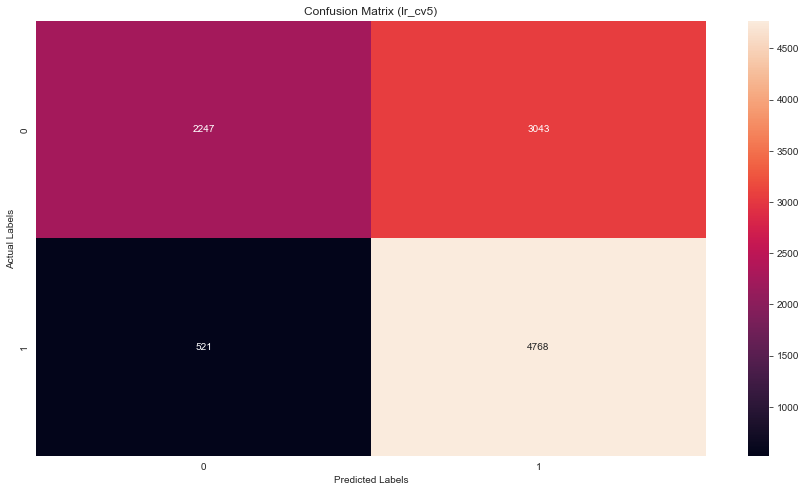

In [186]:
######################################################################################################################################################################################################################################

# Set up a figure grid and axes for the following confusion matrix plots for all four models. 
fig,ax = plt.subplots(1, 1, figsize = (15,8))

# Plot confusion matrix for svm_cv5_best. This model used the data as is.
cm_svm_cv5_best = confusion_matrix(np.array(y_test_booking_outcome).flatten(), svm_cv5_best.predict(X_test_booking_outcome))
sns.heatmap(cm_svm_cv5_best, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels'); 
ax.set_title('Confusion Matrix (lr_cv5)'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

######################################################################################################################################################################################################################################